# Daegu Apartment

## Contents
1. Introduction

    1.1 Problem Statement <br>
    1.2 Goals <br>
    1.3 Analytical Approach <br>

1. Data Understanding
1. Exploratory Data Analysis (EDA)
1. Data Cleaning

    4.1 Duplicated Data <br>
    4.2 Missing Value <br>
    4.3 Data Distribution and Outlier <br>
1. Modelling

    5.1 Data Splitting <br>
    5.2 Encoding Categorical Data <br>
    5.3 Benchmark Model <br>
    5.4 Predict to Test Set with Benchmark Model <br>
1. Hyperparameter Tuning

    6.1 Using Random Forest <br>
    6.2 After Tuning using Random Forest <br>
    6.3 Using XGBoost <br>
    6.4 After Tuning using XGBoost <br>
    6.5 Using Decision Tree <br>
    6.6 After Tuning using Decision Tree <br>
1. Model Explanation

    7.1 Feature Importance <br>
    7.2 Using SHAP <br>
1. Model Limitation

    8.1 Checking the Residual Values <br>
1. Conclusion and Recommendation

    9.1 Conclusion <br>
    9.2 Recommendation <br>


## 1. Introduction
Daegu, adalah kota terbesar keempat di Korea Selatan. Kota ini memiliki populasi sekitar 2,4 juta jiwa, dan merupakan pusat budaya, ekonomi, dan transportasi. Terletak di antara pegunungan seperti Palgongsan dan Apsan, kota ini terhubung dengan Seoul dan Busan melalui kereta cepat dan jalan tol. Dulunya dikenal sebagai pusat industri tekstil, Daegu kini telah berkembang ke sektor elektronik dan manufaktur, mendorong pertumbuhan perkotaannya. 

Dengan keterbatasan lahan yang ada, ditambah dengan bertambahnya jumlah penduduk yang semakin padat, menjadikan apartemen sebagai pilihan utama dalam bertempat tinggal di Daegu. Apartemen menawarkan pemanfaatan lahan yang efisien, menjadikannya solusi praktis di area perkotaan yang padat. Penempatannya yang berada di tengah kota, akan memberikan kenyamanan warga dalam mengakses transportasi umum, sekolah, tempat kerja, dan fasilitas lainnya, secara mudah.

Pemilik apartemen, yang ingin menyewakan apartemen yang dimiliki, akan berdiskusi dengan agen properti atau pihak manajemen gedung dalam menentukan harga sewa. Harga yang akan diberikan kepada calon pembeli merupakan hasil pertimbangan terkait fitur-fitur yang dimiliki, seperti fasilitas kamar, peletakan unit yang dekat dengan tranportasi publik, dan sebagainya. Oleh karena itu, penting bagi pihak penyewa untuk menentukan harga sewa yang sesuai. Apabila terlalu mahal, akan menyulitkan bagi pemilik untuk menyewakan apartemennya, dan apabila terlalu murah, akan menyulitkan pemilik untuk mendapatkan keuntungan.  

### 1.1 Problem Statement 
Berdasarkan masalah yang ditemukan di bagian pendahuluan, memahami faktor-faktor yang mempengaruhi permintaan apartemen di Daegu sangat penting untuk mengatasi tantangan ini dan mengoptimalkan penyewaan properti. Oleh karena itu, diperlukan sebuah model untuk dapat mengatasi permasalahan tersebut, agar pemilik apartemen dapat menetapkan harga yang kompetitif sesuai dengan fasilitas yang dimiliki, dan juga mendapatkan keuntungan maksimal.

### 1.2 Goals
Dengan mengembangkan model prediktif menggunakan Machine Learning, harga kompetitif bagi apartemen dapat ditentukan dengan mempertimbangkan fitur-fitur yang ada, seperti luas unit, aksesibilitas terhadap transportasi publik, gedung perkantoran dan sekolahan, dan sebagainya. Berbagai fitur yang dimiliki oleh sebuah apartemen, akan membantu pemilik apartemen dan agen properti, untuk membuat keputusan secara akurat dalam menetapkan harga sewa.

### 1.3 Analytical Approach
Analisis data dilakukan untuk mengetahui apakah ada hubungan antara fitur-fitur apartemen (berdasarkan dataset) yang mempengaruhi harga sewa. Lalu, model regresi akan dibangun untuk menentukan harga sewa apartemen, sesuai dengan fitur-fitur berpengaruh yang dimiliki oleh tiap unit apartemen.

### 1.4 Metric Evaluation

Model akan dilakukan evaluasi menggunakan metrik berikut:

`R² (R-squared)`

R² (R-squared) adalah metrik evaluasi regresi yang menunjukkan seberapa baik model dapat menjelaskan variabilitas dalam data target. Nilainya berkisar dari 0 hingga 1, di mana nilai mendekati 1 menunjukkan bahwa model dapat menjelaskan sebagian besar variasi dalam data. R² berguna untuk memahami seberapa relevan model terhadap data yang digunakan. <br>

`RMSE (Root Mean Squared Error)`

RMSE mengukur rata-rata kesalahan prediksi antara nilai aktual dan nilai yang diprediksi oleh model. Semakin rendah nilai RMSE, semakin kecil kesalahan prediksi, sehingga model dianggap lebih akurat. RMSE dihitung menggunakan rumus berikut: <br>
                        
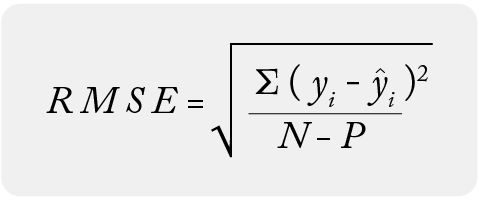

## 2. Data Understanding

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as msno
from scipy.stats import shapiro
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport

Berikut penjelasan untuk tiap atribut di dalam dataset.

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | 	Type of hallway entrance to the apartment  |
| TimeToSubway | Object | 	Time required to reach the nearest Subway Station (min) |
| SubwayStation | Object | Name of the nearest Subway Station |
| N_FacilitiesNearBy(ETC) | Float | Number of facilities near the apartment such as hotels, special needs schools |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of Public Office facilities near the apartment |
| N_SchoolNearBy(University) | Float | Number of Universities near the apartment |
| N_Parkinglot(Basement) | Float | Number of basement parking lots |
| YearBuilt | Integer | Year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities for residents such as swimming pool, gym, playground |
| Size(sqf) | Integer | Apartment size in square feet |
| SalePrice | Integer | Apartment price (USD) |

In [150]:
daegu = pd.read_csv("data_daegu_apartment.csv")
daegu

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0000,3.0000,2.0000,1270.0000,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0000,5.0000,1.0000,0.0000,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0000,7.0000,3.0000,56.0000,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0000,5.0000,4.0000,798.0000,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0000,1.0000,2.0000,536.0000,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0000,3.0000,2.0000,475.0000,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0000,6.0000,5.0000,536.0000,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0000,6.0000,5.0000,536.0000,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0000,5.0000,0.0000,76.0000,1985,3,676,73451


In [151]:
daegu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


Ditemukan bahwa total baris sebanyak 4123, dan total kolom sebanyak 11.


In [152]:
pd.DataFrame(
    {
    'data_type': daegu.dtypes.values,
    'null_value': daegu.isna().mean().values * 100,
    'null_percentage': round((daegu.isna().sum()/len(daegu)*100),2),
    'neg_value': [True if daegu[col].dtype == int and (daegu[col] < 0).any() else False for col in daegu.columns],
    'n_unique': daegu.nunique().values,
    'sample_unique': [daegu[col].unique() for col in daegu.columns]
    }
)

,data_type,null_value,null_percentage,neg_value,n_unique,sample_unique
HallwayType,object,0.0000,0.0000,False,3,"[terraced, mixed, corridor]"
TimeToSubway,object,0.0000,0.0000,False,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
SubwayStation,object,0.0000,0.0000,False,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
N_FacilitiesNearBy(ETC),float64,0.0000,0.0000,False,4,"[0.0, 1.0, 5.0, 2.0]"
N_FacilitiesNearBy(PublicOffice),float64,0.0000,0.0000,False,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
N_SchoolNearBy(University),float64,0.0000,0.0000,False,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
N_Parkinglot(Basement),float64,0.0000,0.0000,False,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
YearBuilt,int64,0.0000,0.0000,False,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
N_FacilitiesInApt,int64,0.0000,0.0000,False,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
Size(sqf),int64,0.0000,0.0000,False,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


Berdasarkan tabel di atas, ditemukan bahwa:

1. Terdapat tiga tipe data di dalam tabel, yaitu object, float64, dan int64.
1. Tidak terdapat nilai null, dan nilai negatif pada setiap fitur dalam tabel.


In [153]:
# Empat fitur yang memiliki tipe data float64 akan diubah menjadi tipe int64.
daegu['N_FacilitiesNearBy(ETC)'] = daegu['N_FacilitiesNearBy(ETC)'].astype(np.int64)
daegu['N_FacilitiesNearBy(PublicOffice)'] = daegu['N_FacilitiesNearBy(PublicOffice)'].astype(np.int64)
daegu['N_SchoolNearBy(University)'] = daegu['N_SchoolNearBy(University)'].astype(np.int64)
daegu['N_Parkinglot(Basement)'] = daegu['N_Parkinglot(Basement)'].astype(np.int64)
daegu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4123 non-null   object
 1   TimeToSubway                      4123 non-null   object
 2   SubwayStation                     4123 non-null   object
 3   N_FacilitiesNearBy(ETC)           4123 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   int64 
 5   N_SchoolNearBy(University)        4123 non-null   int64 
 6   N_Parkinglot(Basement)            4123 non-null   int64 
 7   YearBuilt                         4123 non-null   int64 
 8   N_FacilitiesInApt                 4123 non-null   int64 
 9   Size(sqf)                         4123 non-null   int64 
 10  SalePrice                         4123 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 354.4+ KB


In [154]:
display(daegu.describe(),
daegu.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.0000,4123.0000,4123.0000,4123.0000,4123.0000,4123.0000,4123.0000,4123.0000
mean,1.9309,4.1353,2.7463,568.9791,2002.9998,5.8179,954.6309,221767.9270
std,2.1988,1.8026,1.4966,410.3727,8.9058,2.3405,383.8056,106739.8399
min,0.0000,0.0000,0.0000,0.0000,1978.0000,1.0000,135.0000,32743.0000
25%,0.0000,3.0000,2.0000,184.0000,1993.0000,4.0000,644.0000,144752.0000
50%,1.0000,5.0000,2.0000,536.0000,2006.0000,5.0000,910.0000,209734.0000
75%,5.0000,5.0000,4.0000,798.0000,2008.0000,7.0000,1149.0000,291150.0000
max,5.0000,7.0000,5.0000,1321.0000,2015.0000,10.0000,2337.0000,585840.0000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


## 3. EDA

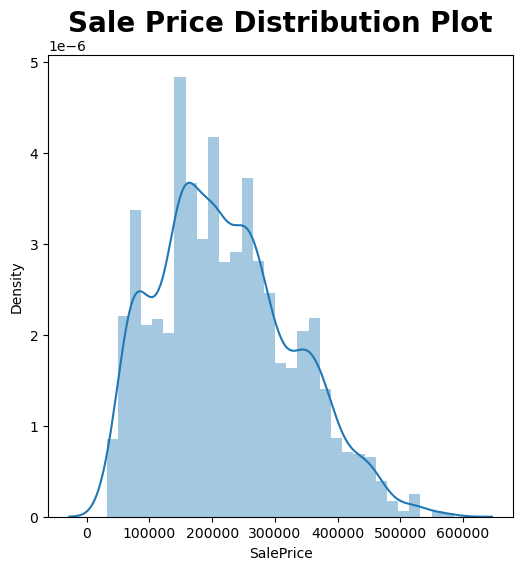

In [155]:
plt.figure(figsize=(6,6))
sns.distplot(daegu['SalePrice'])
plt.title('Sale Price Distribution Plot', size=20, weight='bold')
plt.show()

In [156]:
stat, p = shapiro(daegu['SalePrice'])
print(f"Statistics = {stat}, p = {p}")
if p > 0.05:
    print("Data terdistribusi normal.")
else:
    print("Data tidak terdistribusi normal.")


Statistics = 0.9755791967540614, p = 5.1426131912892506e-26
Data tidak terdistribusi normal.


Berdasarkan distribusi plot harga sewa (SalePrice) apartemen di Daegu, ditemukan bahwa distribusi-nya miring ke kanan (right-skewed). Data tidak terdistribusi normal, dan memiliki kemiringan positif.

In [157]:
daegu.groupby('HallwayType').agg({'HallwayType':'count'})

,HallwayType
HallwayType,
corridor,464
mixed,1131
terraced,2528


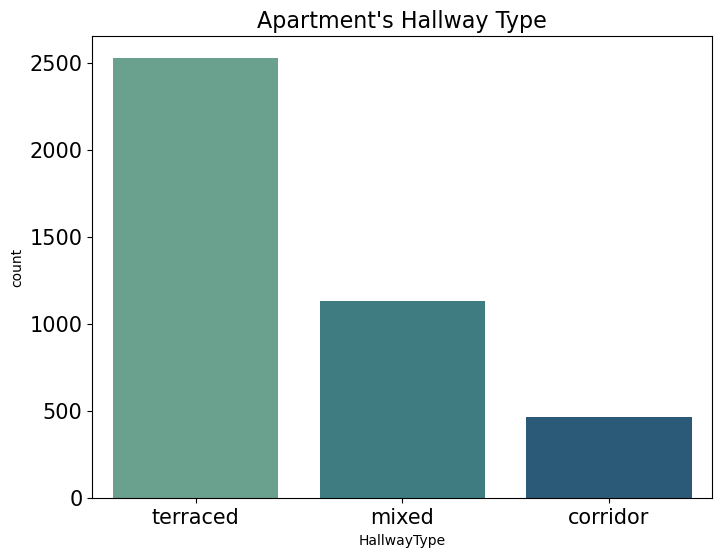

In [158]:
plt.figure(figsize=(8,6))
sns.countplot(data=daegu, x='HallwayType', palette='crest')
plt.title("Apartment's Hallway Type", size=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 

plt.show()

Berdasarkan tipe hallway apartemen, ditemukan bahwa:
1. Tipe terraced memiliki jumlah terbanyak, sebesar 2528 unit.
1. Tipe mixed memiliki jumlah terbanyak kedua, sebesar 1131 unit.
1. Tipe corridor memiliki jumlah paling sedikit, sebesar 464 unit.

In [159]:
temp_df = daegu['TimeToSubway'].value_counts().reset_index()
temp_df.columns = ['Time To Subway', 'Number of Apartments']
temp_df

,Time To Subway,Number of Apartments
0,0-5min,1953
1,5min~10min,787
2,15min~20min,629
3,10min~15min,583
4,no_bus_stop_nearby,171


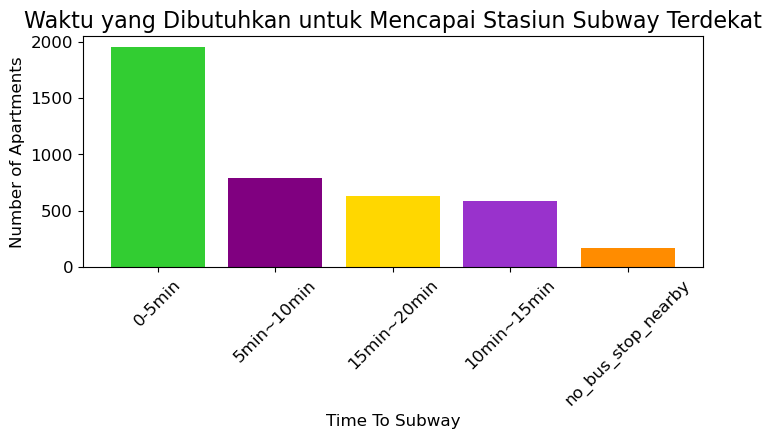

In [160]:
# Create a DataFrame with counts instead of percentages

# List of colors for the bars
colors = ['#32CD32', '#800080', '#FFD700', '#9932CC', '#FF8C00']

# Plotting the barplot
plt.figure(figsize=(8, 3))
plt.title('Waktu yang Dibutuhkan untuk Mencapai Stasiun Subway Terdekat', fontsize=16)

bars = plt.bar(temp_df['Time To Subway'], temp_df['Number of Apartments'], color=colors)

# Customize axis labels and ticks
plt.xlabel('Time To Subway', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Berdasarkan waktu yang dibutuhkan untuk mencapai stasiun subway terdekat, ditemukan bahwa:
1. Jumlah unit apartemen terbanyak berada pada lokasi yang tidak jauh dari stasiun subway, yang membutuhkan waktu 0-5 menit untuk mencapai stasiun tersebut.
1. Urutan kedua hingga ke-empat diisi oleh unit apartemen yang membutuhkan waktu sebanyak 5-10 menit, 15-20 menit, dan 10-15 menit. Jumlah unit pada ketiga range waktu tersebut tidak jauh berbeda, berada pada kisaran 500 hingga 700.
1. Unit apartemen yang di sekitarnya tidak memiliki bus stop untuk mencapai stasiun subway, menjadi unit dengan jumlah paling sedikit, yaitu berjumlah 171.

In [161]:
temp_df = daegu['SubwayStation'].value_counts().reset_index()
temp_df.columns = ['Subway Station', 'Number of Apartments']
temp_df

,Subway Station,Number of Apartments
0,Kyungbuk_uni_hospital,1152
1,Myung-duk,1044
2,Banwoldang,529
3,Bangoge,502
4,Sin-nam,467
5,no_subway_nearby,290
6,Chil-sung-market,74
7,Daegu,65


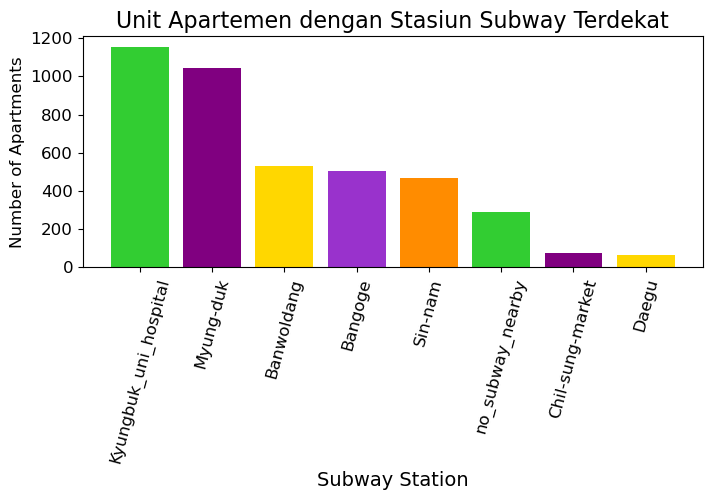

In [162]:
# Create a DataFrame with counts instead of percentages

# List of colors for the bars
colors = ['#32CD32', '#800080', '#FFD700', '#9932CC', '#FF8C00']

# Plotting the barplot
plt.figure(figsize=(8, 3))
plt.title('Unit Apartemen dengan Stasiun Subway Terdekat', fontsize=16)

bars = plt.bar(temp_df['Subway Station'], temp_df['Number of Apartments'], color=colors)

# Customize axis labels and ticks
plt.xlabel('Subway Station', fontsize=14)
plt.ylabel('Number of Apartments', fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Berdasarkan unit apartemen dengan stasiun subway terdekat, ditemukan bahwa:
1. Sebanyak lebih dari 1000 unit apartemen yang dekat dengan stasiun Kyungbuk uni hospital dan Myung duk.
1. Unit apartemen yang dekat dengan Stasiun Chi sung market dan Daegu memiliki jumlah unit yang paling sedikit, tidak mencapai 100.

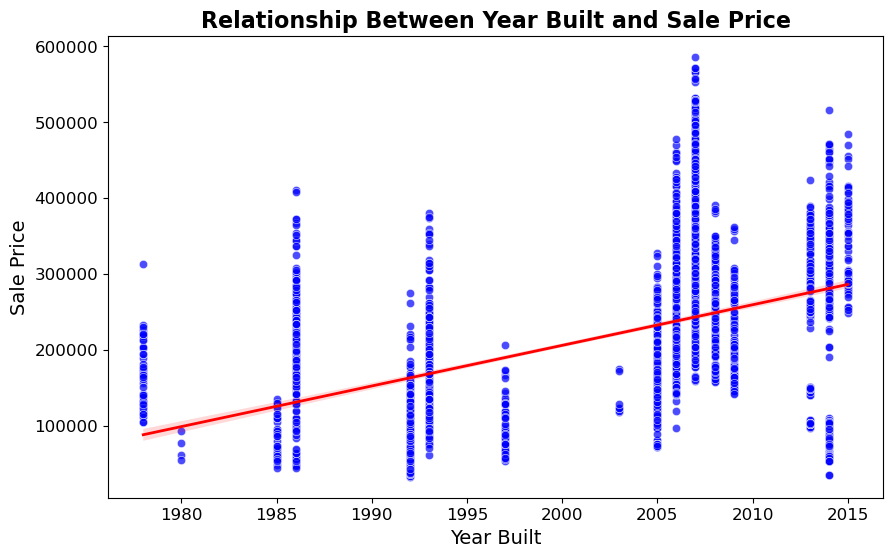

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daegu, x='YearBuilt', y='SalePrice', alpha=0.7, color='blue')
sns.regplot(data=daegu, x='YearBuilt', y='SalePrice', scatter=False, color='red', line_kws={"linewidth":2})
plt.title('Relationship Between Year Built and Sale Price', fontsize=16, weight='bold')
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Berdasarkan hubungan antara `YearBuilt` dan `SalePrice`, ditemukan bahwa:
1. Harga sewa apartemen cenderung meningkat seiring berjalannya waktu, di mana lebih muda tahun pembangunannya, maka lebih tinggi harga sewa-nya.
1. Harga sewa apartemen bervariasi pada tiap tahunnya, yang menjelaskan bahwa terdapat faktor lain yang memberikan dampak terhadap harga sewa, tidak hanya tahun pembangunan saja.

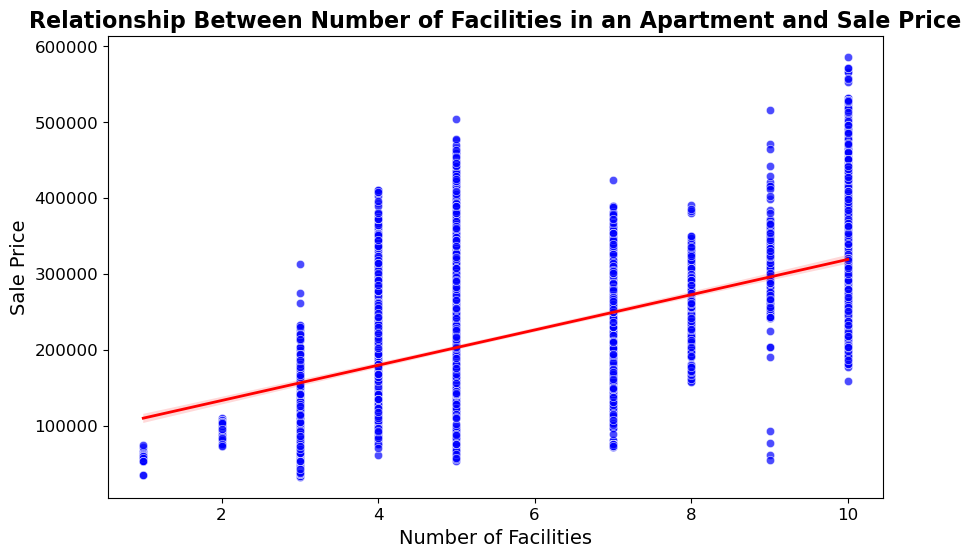

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daegu, x='N_FacilitiesInApt', y='SalePrice', alpha=0.7, color='blue')
sns.regplot(data=daegu, x='N_FacilitiesInApt', y='SalePrice', scatter=False, color='red', line_kws={"linewidth":2})
plt.title('Relationship Between Number of Facilities in an Apartment and Sale Price', fontsize=16, weight='bold')
plt.xlabel('Number of Facilities', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Berdasarkan hubungan antara `N_FacilitiesInApt` dan `SalePrice`, ditemukan bahwa:
1. Terdapat korelasi positif antara kedua fitur tersebut, yang menunjukkan semakin banyak fasilitas yang ada di dalam apartemen, maka harga sewa akan cenderung tinggi.
1. Apartemen dengan jumlah fasilitas sebanyak 10 menunjukkan harga sewa yang sangat tinggi, yanng menjelaskan bahwa kemewahan yang diberikan oleh developer atau apartemen tersebut selaras dengan harga sewa-nya.
1. Terdapat variasi yang signifikan dalam harga sewa bahkan dengan jumlah fasilitas yang sama, menunjukkan bahwa faktor lain juga mungkin memengaruhi harga sewa.

In [165]:
#report = ProfileReport(daegu)
#report

## 4. Data Cleaning

### 4.1 Duplicated Data

In [166]:
daegu[daegu.duplicated()].sort_values(by=['SalePrice'],ascending=False)


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2918,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,570796
3868,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,529203
3379,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,529203
4087,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,527433
1982,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,517699
...,...,...,...,...,...,...,...,...,...,...,...
835,corridor,10min~15min,Myung-duk,5,7,5,0,1992,3,355,36283
3961,corridor,10min~15min,Myung-duk,5,7,5,0,1992,3,355,35840
2262,corridor,5min~10min,no_subway_nearby,1,4,1,218,2014,1,135,35398
1210,corridor,10min~15min,Myung-duk,5,7,5,0,1992,3,355,35398


Terdapat total 1422 data duplikat. Selanjutnya, tahapan yang dilakukan adalah dengan melakukan drop data duplikat tersebut, dan memilih data yang paling terakhir. Hal ini dilakukan, dengan asumsi bahwa data terakhir yang dimasukkan merupakan data yang paling akhir atau paling ter-update.

In [167]:
daegu_cleaned = daegu.drop_duplicates(keep='last')
daegu_cleaned

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504
5,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,118584
7,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,572,143362
8,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,172566
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2,5,0,76,1985,3,676,73451


Setelah data duplikat di-drop, jumlah baris menjadi 2701.

In [168]:
display(daegu_cleaned.describe(),
daegu_cleaned.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.0000,2701.0000,2701.0000,2701.0000,2701.0000,2701.0000,2701.0000,2701.0000
mean,1.8904,4.0270,2.6805,533.7464,2002.3584,5.7134,984.0289,229511.3658
std,2.1532,1.8875,1.5045,418.2249,9.1519,2.3866,391.9826,105079.8913
min,0.0000,0.0000,0.0000,0.0000,1978.0000,1.0000,135.0000,32743.0000
25%,0.0000,3.0000,2.0000,181.0000,1993.0000,4.0000,743.0000,153539.0000
50%,1.0000,4.0000,2.0000,536.0000,2006.0000,5.0000,910.0000,221238.0000
75%,5.0000,5.0000,4.0000,798.0000,2007.0000,7.0000,1167.0000,300884.0000
max,5.0000,7.0000,5.0000,1321.0000,2015.0000,10.0000,2337.0000,585840.0000


,HallwayType,TimeToSubway,SubwayStation
count,2701,2701,2701
unique,3,5,8
top,terraced,0-5min,Myung-duk
freq,1667,1248,709


In [169]:
daegu_cleaned.loc[daegu_cleaned['TimeToSubway'] == '5min~10min', 'TimeToSubway']='5min-10min'
daegu_cleaned.loc[daegu_cleaned['TimeToSubway'] == '10min~15min', 'TimeToSubway']='10min-15min'
daegu_cleaned.loc[daegu_cleaned['TimeToSubway'] == '15min~20min', 'TimeToSubway']='15min-20min'

Untuk menyeragamkan values in di dalam kolom `TimeToSubway`, maka simbol `~` akan diganti dengan `-`.

In [170]:
daegu_cleaned.groupby(['HallwayType','SubwayStation','TimeToSubway'])['HallwayType'].count()

HallwayType  SubwayStation          TimeToSubway      
corridor     Banwoldang             5min-10min             32
             Daegu                  5min-10min             41
             Kyungbuk_uni_hospital  0-5min                 44
             Myung-duk              10min-15min           144
             Sin-nam                5min-10min             47
             no_subway_nearby       5min-10min             28
mixed        Bangoge                5min-10min            280
             Chil-sung-market       15min-20min            65
             Myung-duk              15min-20min           353
terraced     Banwoldang             0-5min                301
             Daegu                  5min-10min             13
             Kyungbuk_uni_hospital  0-5min                358
                                    10min-15min           290
             Myung-duk              0-5min                212
             Sin-nam                0-5min                333
             no

In [171]:
# Grouping and counting
grouped_counts = (
    daegu_cleaned.groupby(['HallwayType', 'SubwayStation', 'TimeToSubway'])['HallwayType']
    .count()
    .reset_index(name='Count')  # Use 'name' to avoid conflicts
)

# Filter where SubwayStation == 'no_subway_nearby'
filtered_counts = grouped_counts[grouped_counts['SubwayStation'] == 'no_subway_nearby']

print(filtered_counts)


   HallwayType     SubwayStation        TimeToSubway  Count
5     corridor  no_subway_nearby          5min-10min     28
15    terraced  no_subway_nearby          5min-10min     60
16    terraced  no_subway_nearby  no_bus_stop_nearby    100


Berdasarkan hasil groupby di atas, dapat dilihat pada kolom `SubwayStation` terdapat `no_subway_nearby`, yang menjelaskan bahwa pada apartemen dengan `HallwayType` tersebut, tidak ditemukan stasiun subway terdekat. Namun, apabila diperhatikan kembali, pada `HallwayType` = `corridor`, dan `SubwayStation` = `no_subway_nearby`, ternyata `TimeToSubway`-nya sebesar `5min-10min`. Temuan data ini merupakan anomali, karena seharusnya jika tidak ada stasiun subway terdekat, maka waktu yang dibutuhkan akan lebih dari `5min-10min`, karena pada kolom `SubwayStation` lain, contohnya pada stasiun subway `Myung-duk`, pada tipe hallway `corridor`, ditemukan bahwa `TimeToSubway`-nya selama `10min-15min`. 

Oleh karena itu, data dengan `SubwayStation` = `no_subway_nearby`, `TimeToSubway`-nya akan dimodifikasi menjadi = `no_bus_stop_nearby` semua. Dengan value ini, diasumsikan bahwa karena tidak terdapat pemberhentian bus di sekitar apartemen, maka membutuhkan waktu lebih dari 20 menit untuk mencapai stasiun subway terdekat, baik menggunakan bus sambungan atau moda transportasi lainnya.

In [172]:
# Update the TimeToSubway column
daegu_cleaned.loc[daegu_cleaned['SubwayStation'] == 'no_subway_nearby', 'TimeToSubway'] = 'no_bus_stop_nearby'

In [173]:
daegu_cleaned.sample(10)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
3360,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,460176
1449,corridor,5min-10min,Daegu,2,5,0,76,1985,3,587,93805
339,terraced,0-5min,Banwoldang,0,4,1,605,2007,5,1444,348672
1971,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,250442
3530,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1519,484955
50,corridor,5min-10min,Daegu,2,5,0,76,1985,3,676,61946
2048,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,2092,221238
3886,terraced,no_bus_stop_nearby,no_subway_nearby,0,1,1,1321,2015,10,644,269911
3715,terraced,5min-10min,Daegu,0,3,2,400,2015,7,914,345132
799,corridor,5min-10min,Daegu,2,5,0,76,1985,3,498,61946


### 4.2 Missing Value

Selanjutnya, akan dilakukan pengecekan ulang terkait missing value dalam dataset. 

<Axes: >

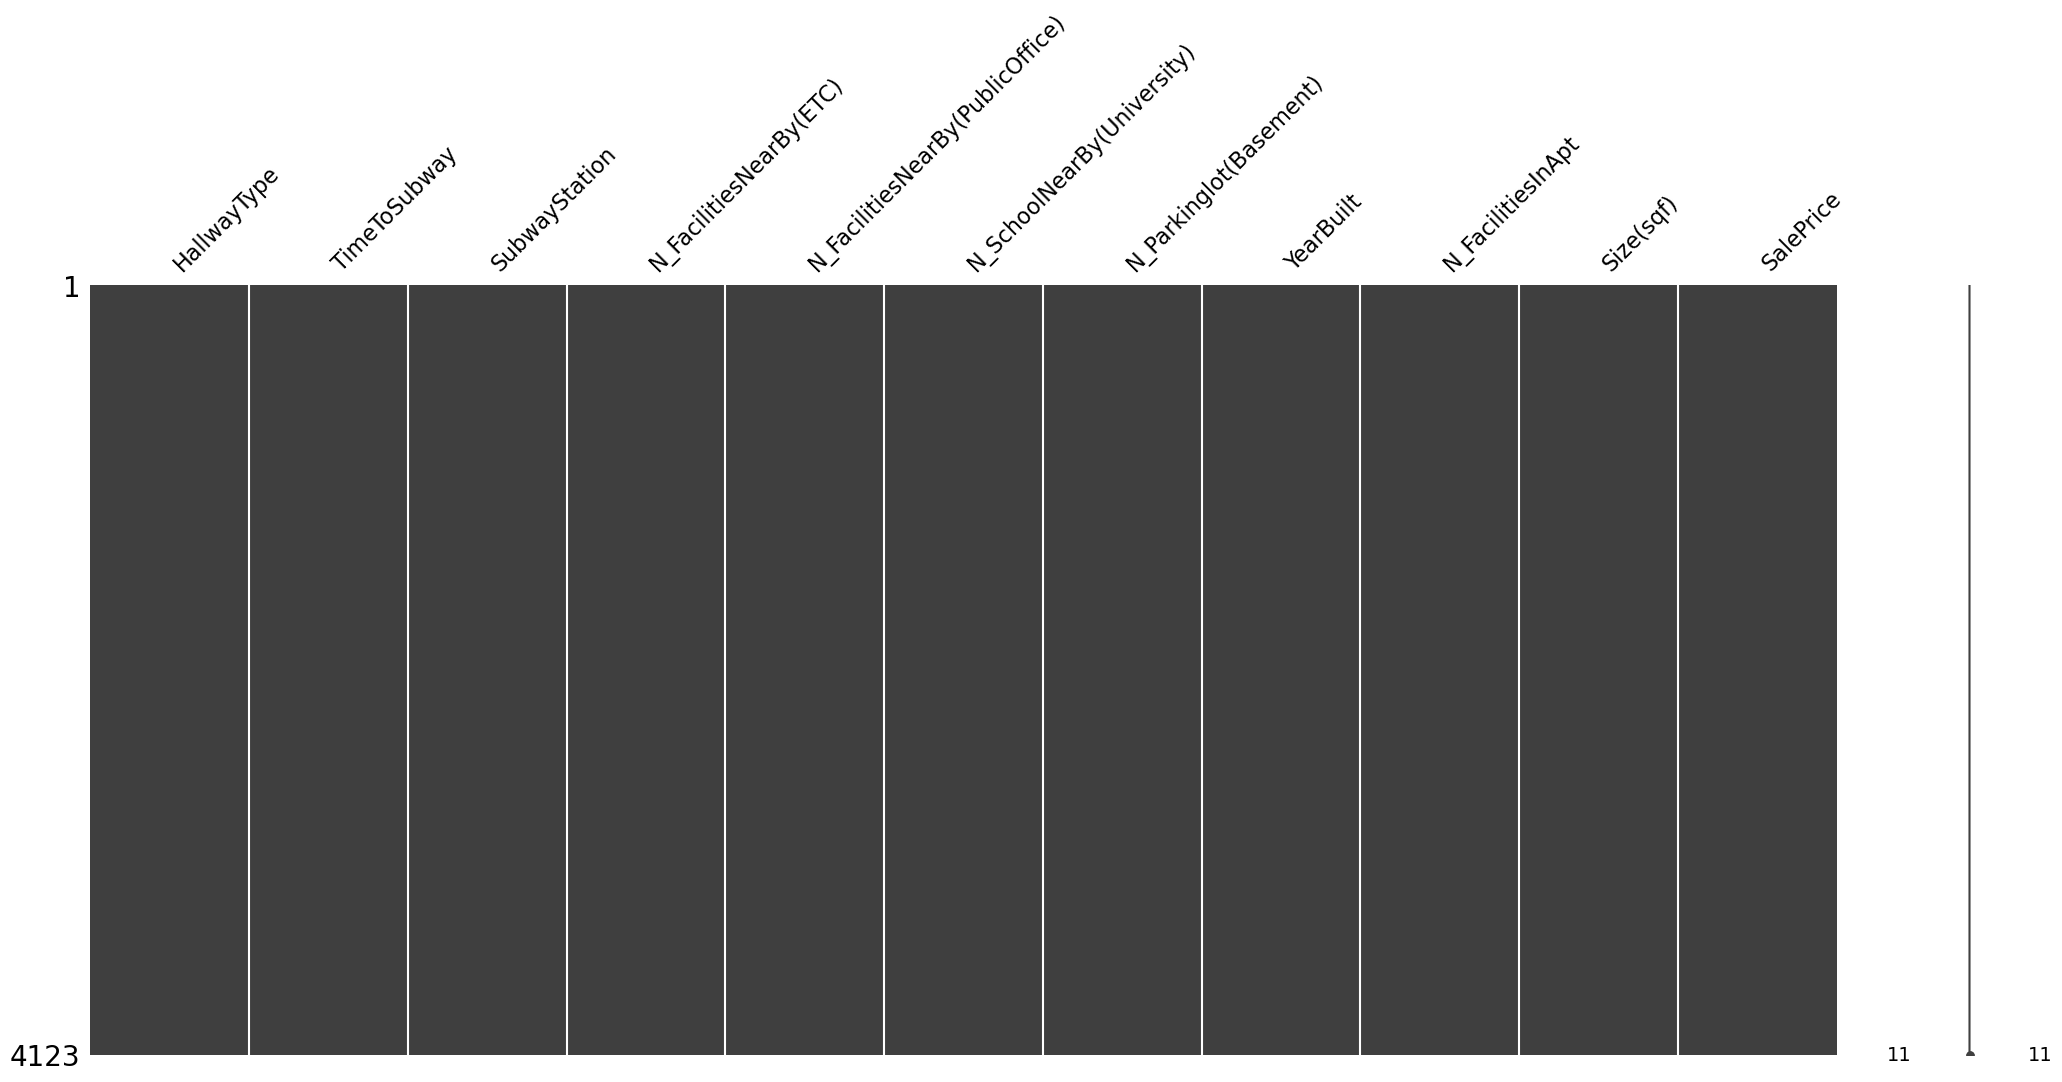

In [174]:
msno.matrix(daegu)

Tidak terdapat missing value dalam dataset.

In [175]:
daegu.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

### 4.3 Data Distribution and Outliers

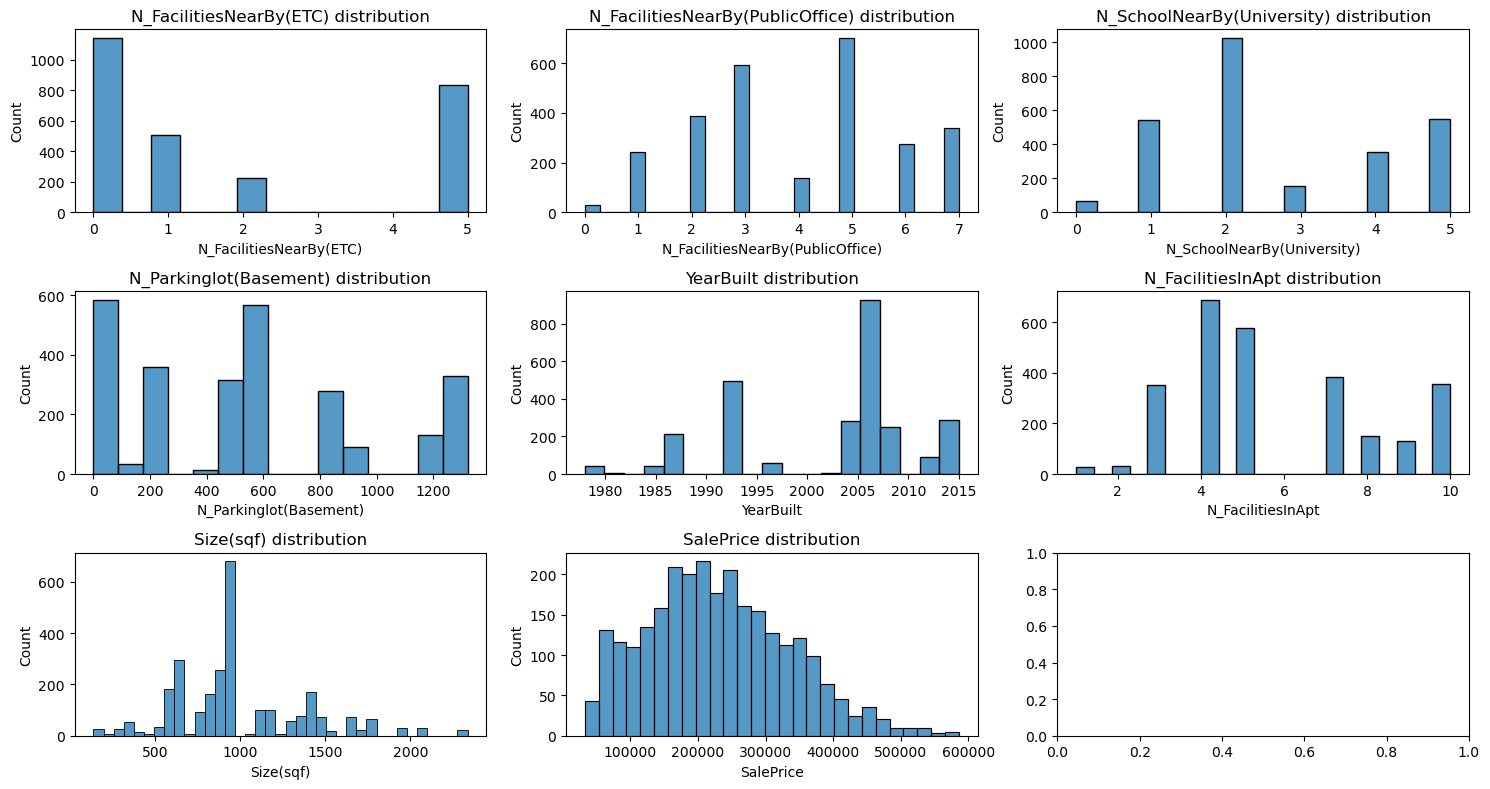

In [176]:
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize=(15, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(daegu_cleaned.select_dtypes(include= np.number).columns):

    # Add the boxplot
    sns.histplot(x= daegu_cleaned[column], ax= axes[i])

    # Add title and axis label
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

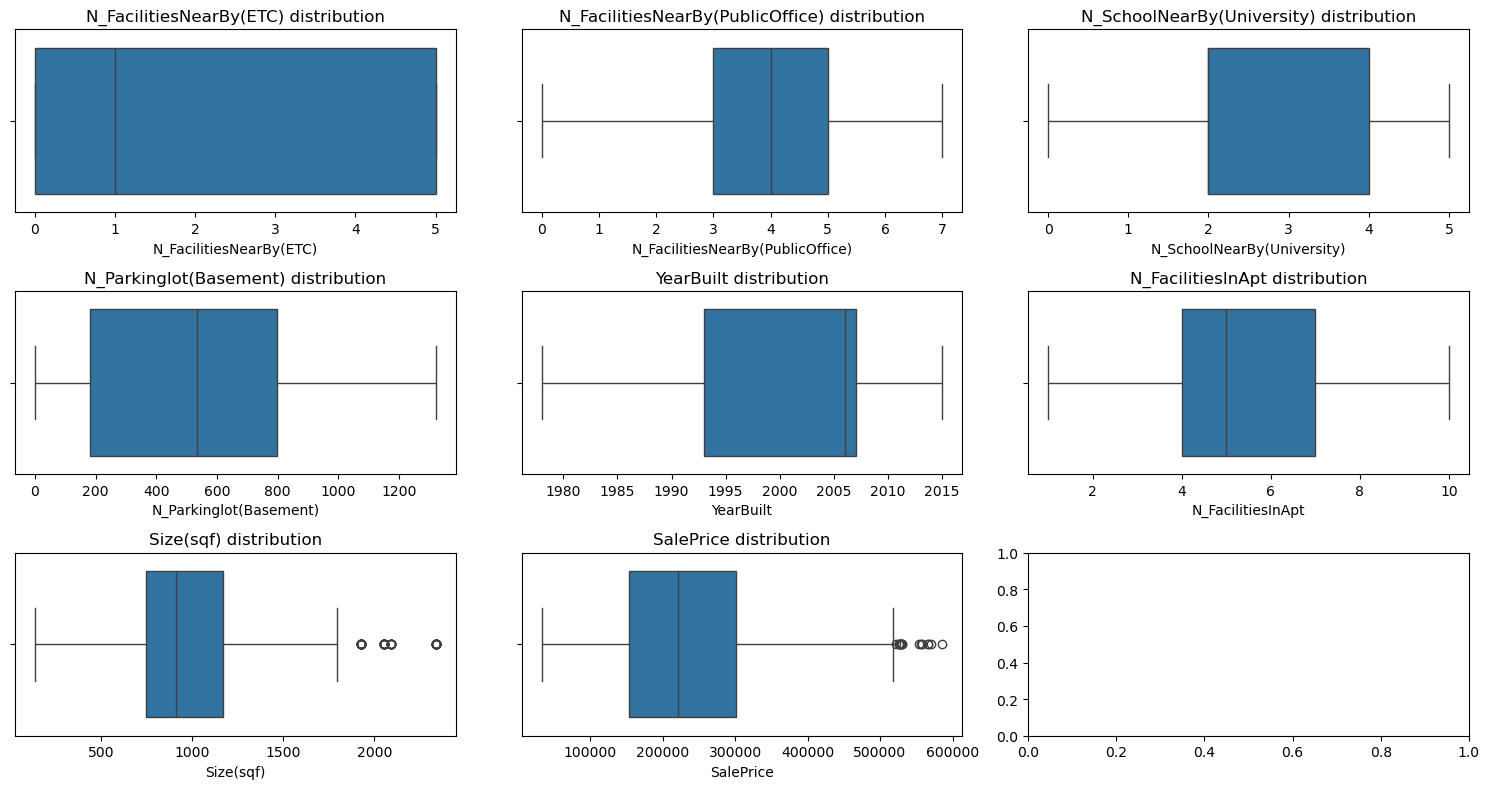

In [177]:
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize=(15, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(daegu_cleaned.select_dtypes(include= np.number).columns):

    # Add the boxplot
    sns.boxplot(x= daegu_cleaned[column], ax= axes[i])

    # Add title and axis label
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Terdapat nilai outlier pada kolom `Size(sqf)` dan `SalePrice`. Selanjutnya, dilakukan pengecekan terkait nilai kuartil, lower dan upper bound limit, dan jumlah outlier dalam kedua kolom tersebut.

In [178]:
# Data Size(sqf)
q1_size = np.percentile (daegu_cleaned['Size(sqf)'], 25, method='midpoint')
q2_size = np.percentile (daegu_cleaned['Size(sqf)'], 50, method='midpoint')
q3_size = np.percentile (daegu_cleaned['Size(sqf)'], 75, method='midpoint')

iqr_size = (q3_size - q1_size)

lowerbound_size = q1_size - (1.5 *iqr_size)
upperbound_size = q3_size + (1.5 *iqr_size)

outliers_above = daegu_cleaned['Size(sqf)'][daegu_cleaned['Size(sqf)'] > upperbound_size].count()
outliers_below = daegu_cleaned['Size(sqf)'][daegu_cleaned['Size(sqf)'] < lowerbound_size].count()
total_outliers = outliers_above + outliers_below
outliers_percent_size = (total_outliers / len(daegu_cleaned)) * 100


print (f'Q1 : {q1_size}')
print (f'Q2 : {q2_size}')
print (f'Q3 : {q3_size}')
print (f'IQR : {iqr_size}')
print (f'Lower Bound Limit : {lowerbound_size}')
print (f'Upper Bound Limit : {upperbound_size}')
print(f"Number of Outliers Above Upper Bound: {outliers_above}")
print(f"Number of Outliers Below Lower Bound: {outliers_below}")  
print (f"Total Outliers: {total_outliers}")
print (f"Outliers Percentage: {outliers_percent_size.round(2)}%")

Q1 : 743.0
Q2 : 910.0
Q3 : 1167.0
IQR : 424.0
Lower Bound Limit : 107.0
Upper Bound Limit : 1803.0
Number of Outliers Above Upper Bound: 84
Number of Outliers Below Lower Bound: 0
Total Outliers: 84
Outliers Percentage: 3.11%


In [179]:
daegu_cleaned['Size(sqf)'].describe()

count   2701.0000
mean     984.0289
std      391.9826
min      135.0000
25%      743.0000
50%      910.0000
75%     1167.0000
max     2337.0000
Name: Size(sqf), dtype: float64

In [180]:
# Dilakukan pengecekan untuk mencari nilai SalePrice yang lebih besar dari nilai Upper Bound Limit
size_outliers = daegu_cleaned[daegu_cleaned['Size(sqf)'] > upperbound_size]
size_outliers

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
106,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,2337,243362
207,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,348283
234,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,566371
288,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,2092,300884
549,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,553097
...,...,...,...,...,...,...,...,...,...,...,...
3949,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,556637
3977,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,383716
4027,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,2337,193805
4074,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,2337,254424


In [181]:
no_outliers_size = daegu_cleaned[daegu_cleaned['Size(sqf)'] < upperbound_size]
no_outliers_size

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504
5,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,118584
7,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,572,143362
8,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,172566
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1451,242477
4120,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4121,corridor,5min-10min,Daegu,2,5,0,76,1985,3,676,73451


In [182]:
# Data SalePrice
q1_price = np.percentile (daegu_cleaned['SalePrice'], 25, method='midpoint')
q2_price = np.percentile (daegu_cleaned['SalePrice'], 50, method='midpoint')
q3_price = np.percentile (daegu_cleaned['SalePrice'], 75, method='midpoint')

iqr_price = (q3_price - q1_price)

lowerbound_price = q1_price - (1.5 *iqr_price)
upperbound_price = q3_price + (1.5 *iqr_price)

outliers_above = daegu_cleaned['SalePrice'][daegu_cleaned['SalePrice'] > upperbound_price].count()
outliers_below = daegu_cleaned['SalePrice'][daegu_cleaned['SalePrice'] < lowerbound_price].count()
total_outliers = outliers_above + outliers_below
outliers_percent_price = (total_outliers / len(daegu_cleaned)) * 100


print (f'Q1 : {q1_price}')
print (f'Q2 : {q2_price}')
print (f'Q3 : {q3_price}')
print (f'IQR : {iqr_price}')
print (f'Lower Bound Limit : {lowerbound_price}')
print (f'Upper Bound Limit : {upperbound_price}')
print(f"Number of Outliers Above Upper Bound: {outliers_above}")
print(f"Number of Outliers Below Lower Bound: {outliers_below}")  
print (f"Total Outliers: {total_outliers}")
print (f"Outliers Percentage: {outliers_percent_price.round(2)}%")

Q1 : 153539.0
Q2 : 221238.0
Q3 : 300884.0
IQR : 147345.0
Lower Bound Limit : -67478.5
Upper Bound Limit : 521901.5
Number of Outliers Above Upper Bound: 17
Number of Outliers Below Lower Bound: 0
Total Outliers: 17
Outliers Percentage: 0.63%


In [183]:
daegu_cleaned['SalePrice'].describe()

count     2701.0000
mean    229511.3658
std     105079.8913
min      32743.0000
25%     153539.0000
50%     221238.0000
75%     300884.0000
max     585840.0000
Name: SalePrice, dtype: float64

In [184]:
# Dilakukan pengecekan untuk mencari nilai SalePrice yang lebih besar dari nilai Upper Bound Limit
price_outliers = daegu_cleaned[daegu_cleaned['SalePrice'] > upperbound_price]
price_outliers

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
204,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,566371
549,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,553097
656,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,528318
1180,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,530973
1295,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1519,526548
1895,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,522123
1998,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,526548
2100,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1519,530973
2128,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,585840


Berdasarkan pencarian outliers pada kolom `Size(sqf)` dan `SalePrice` di atas, ditemukan bahwa terdapat `17` baris yang melebihi nilai upper bound pada `SalePrice`, dengan persentase outlier sebesar `0.63%`. Untuk `Size(sqf)`, ditemukan terdapat `84` baris yang melebihi nilai upper bound, dengan persentase outlier sebesar `3.11%`.

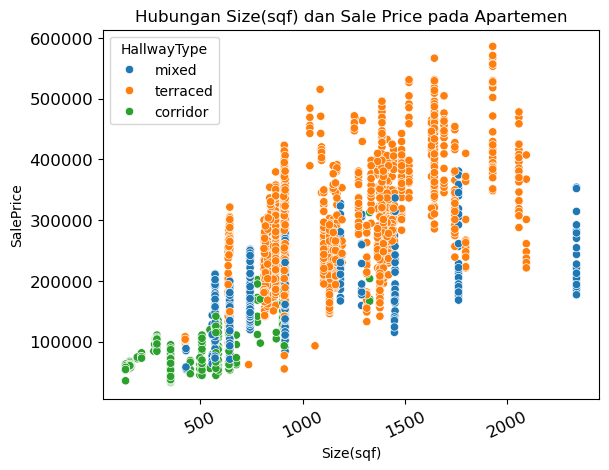

In [185]:
# Hubungan ukuran apartmen dengan harga apartment berdasarkan tipe apartment

sns.scatterplot(data=daegu_cleaned ,x='Size(sqf)',y='SalePrice',hue='HallwayType')
plt.title('Hubungan Size(sqf) dan Sale Price pada Apartemen')
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

In [186]:
# Drop rows where SalePrice is greater than upperbound_price
daegu_cleaned = daegu_cleaned[daegu_cleaned['Size(sqf)'] <= upperbound_size]
daegu_cleaned

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504
5,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,118584
7,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,572,143362
8,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,172566
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1451,242477
4120,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4121,corridor,5min-10min,Daegu,2,5,0,76,1985,3,676,73451


### 4.4 Data Correlation

In [187]:
daegu_num = daegu_cleaned.drop(columns = ['HallwayType','TimeToSubway','SubwayStation'])

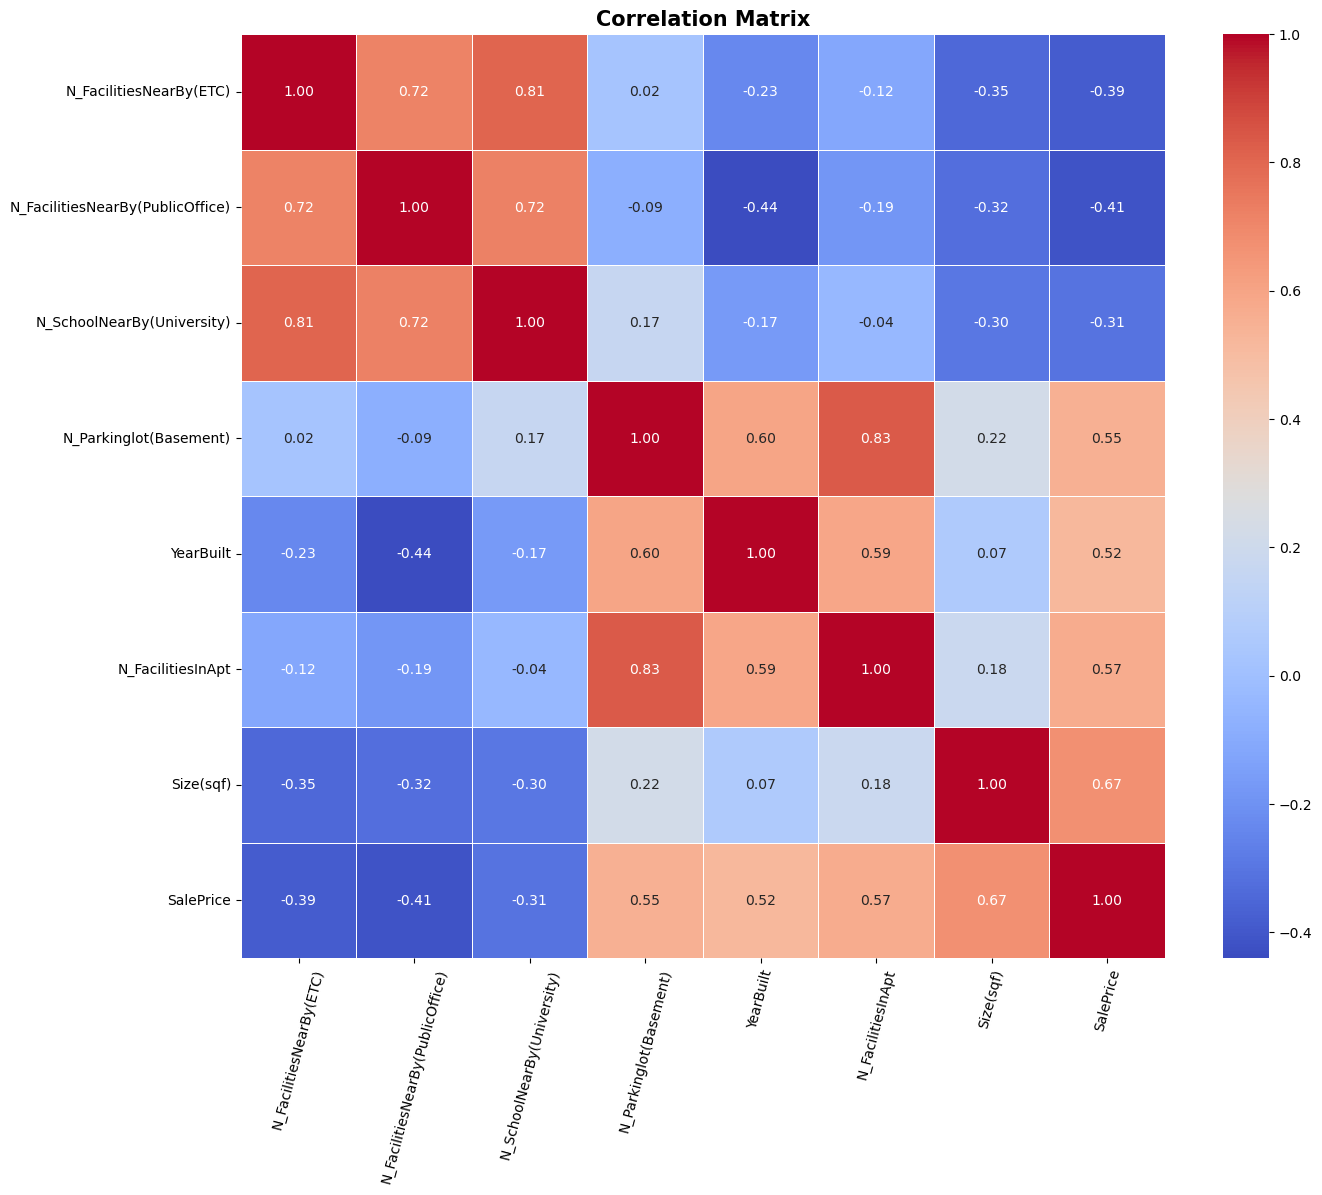

In [188]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette='coolwarm'
corr = daegu_num.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.xticks(rotation=75)
plt.show()

Berdasarkan matriks korelasi di atas, terlihat bahwa fitur `N_Parkinglot(Basement)`, `YearBuilt`, `N_FacilitiesInApt` dan `Size(sqf)` memiliki korelasi yang kuat terhadap fitur `SalePrice`. Korelasi paling tinggi dimiliki oleh fitur `Size(sqf)` sebesar `0.66` yang menunjukkan bahwa `SalePrice` meningkat seiring dengan kenaikan `Size(sqf)`. Korelasi tertinggi selanjutnya diikuti oleh `N_FacilitiesInApt` dan `N_Parkinglot(Basement)` sebesar `0.57` dan `0.56`.

Fitur `N_FacilitiesNearBy(PublicOffice)` memiliki nilai `-0.42` terhadap `SalePrice`. Hal ini berarti bahwa `SalePrice` akan meningkat seiring dengan menurunnya jumlah `N_FacilitiesNearBy(PublicOffice)`. Begitu pula pada fitur `N_FacilitiesNearby(ETC)` dan `N_SchoolNearBy(University)`, semakin menurun jumlahnya maka nilai `SalePrice` akan terus meningkat. 

In [189]:
# Check the correlation and signification
# dfCorrMap = daegu_cleaned
# heatmap of variable correlation 
#fig, ax = plt.subplots(figsize=(25, 15))
#phik_overview = dfCorrMap.phik_matrix()
#corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
#sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"fontsize":30})
#sns.set(font_scale=2)
#plt.xticks(rotation=75)
#plt.show()

### 4.5 Handling Rare Categorical Data

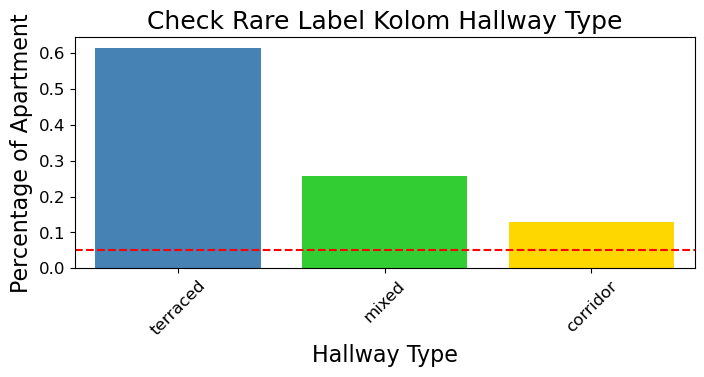

In [190]:
# Get the value counts as percentages for the HallwayType column
temp_df = pd.Series(daegu_cleaned['HallwayType'].value_counts() / len(daegu_cleaned))

# Create a new column to categorize as 'rare' based on percentage threshold
temp_df = temp_df.reset_index()
temp_df.columns = ['HallwayType', 'Percentage']
temp_df['Is_Rare'] = temp_df['Percentage'] < 0.05  # Assuming 5% threshold for rare labels

# List of colors you want to use for each HallwayType
colors = ['#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF4500', '#2E8B57']  # Add more colors if needed

# Plotting the barplot with hue based on the 'Is_Rare' column
plt.figure(figsize=(8, 3))
plt.title('Check Rare Label Kolom Hallway Type', fontsize=18)

sns.barplot(data=temp_df, x='HallwayType', y='Percentage')

# Manually assigning different colors to each bar
for i, bar in enumerate(plt.gca().patches):  # 'patches' contains the bars
    bar.set_facecolor(colors[i % len(colors)])  # Assign a unique color from the list to each bar

plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Hallway Type', fontsize=16)
plt.ylabel('Percentage of Apartment', fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


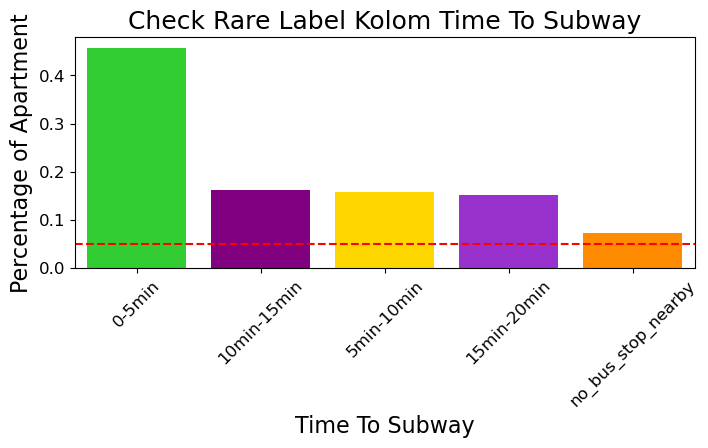

In [191]:
# Get the value counts as percentages for the HallwayType column
temp_df = pd.Series(daegu_cleaned['TimeToSubway'].value_counts() / len(daegu_cleaned))

# Create a new column to categorize as 'rare' based on percentage threshold
temp_df = temp_df.reset_index()
temp_df.columns = ['TimeToSubway', 'Percentage']
temp_df['Is_Rare'] = temp_df['Percentage'] < 0.05  # Assuming 5% threshold for rare labels

# List of colors you want to use for each HallwayType
colors = ['#32CD32', '#800080', '#FFD700', '#9932CC', '#FF8C00']

# Plotting the barplot with hue based on the 'Is_Rare' column
plt.figure(figsize=(8, 3))
plt.title('Check Rare Label Kolom Time To Subway', fontsize=18)

sns.barplot(data=temp_df, x='TimeToSubway', y='Percentage')

# Manually assigning different colors to each bar
for i, bar in enumerate(plt.gca().patches):  # 'patches' contains the bars
    bar.set_facecolor(colors[i % len(colors)])  # Assign a unique color from the list to each bar

plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Time To Subway', fontsize=16)
plt.ylabel('Percentage of Apartment', fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


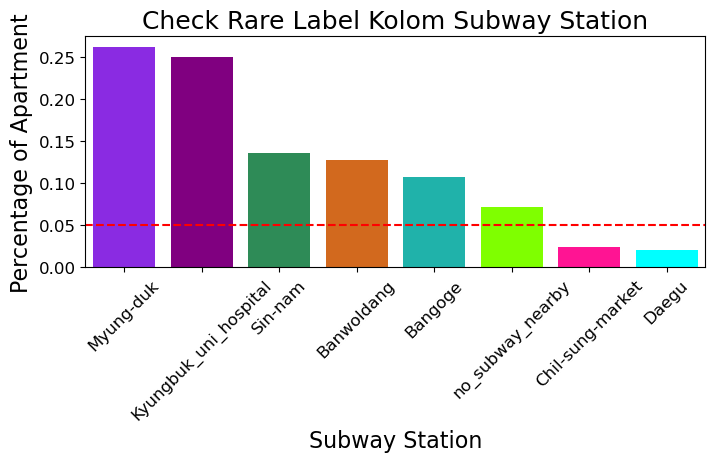

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the value counts as percentages for the HallwayType column
temp_df = pd.Series(daegu_cleaned['SubwayStation'].value_counts() / len(daegu_cleaned))

# Create a new column to categorize as 'rare' based on percentage threshold
temp_df = temp_df.reset_index()
temp_df.columns = ['SubwayStation', 'Percentage']
temp_df['Is_Rare'] = temp_df['Percentage'] < 0.05  # Assuming 5% threshold for rare labels

# List of colors you want to use for each HallwayType
colors = ['#8A2BE2', '#800080', '#2E8B57', '#D2691E', '#20B2AA', '#7FFF00', '#FF1493', '#00FFFF']

# Plotting the barplot with hue based on the 'Is_Rare' column
plt.figure(figsize=(8, 3))
plt.title('Check Rare Label Kolom Subway Station', fontsize=18)

sns.barplot(data=temp_df, x='SubwayStation', y='Percentage')

# Manually assigning different colors to each bar
for i, bar in enumerate(plt.gca().patches):  # 'patches' contains the bars
    bar.set_facecolor(colors[i % len(colors)])  # Assign a unique color from the list to each bar

plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Subway Station', fontsize=16)
plt.ylabel('Percentage of Apartment', fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## 5. Modelling

### 5.1 Data Splitting

In [193]:
## Memisahkan Data Variabel Independen dari target

X = daegu_cleaned.drop(['SalePrice'], axis=1)
y = daegu_cleaned['SalePrice']

# Membagi training dan test data dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size=0.20,
    random_state=6)

### 5.2 Preprocessing

In [194]:
ordinal_mapping = [
    {'col':'TimeToSubway',
     'mapping':{'no_bus_stop_nearby':0, '15min-20min':1, '10min-15min':2, '5min-10min':3, '0-5min':4 }}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
                                ('one_hot_encoder', OneHotEncoder(drop='first'), ['SubwayStation', 'HallwayType']),
                                
                                ('ordinal_encoder', ce.OrdinalEncoder(), ['TimeToSubway'])
], remainder='passthrough')

In [195]:
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['SubwayStation',
                                                   'HallwayType']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['TimeToSubway'])]))])

### 5.3 Benchmark Model

In [196]:
# Algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=6)
rf = RandomForestRegressor(random_state=6)
xgb = XGBRegressor(random_state=6)
rd = Ridge(random_state=6)
las = Lasso(random_state=6)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, rd, las]

def calculate_adjusted_r2(r2, n, p):
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    return adj_r2

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []
adjusted_r_squared = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

training_times = []

# Mencari algoritma terbaik berdasarkan nilai metric evaluation
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=6)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

   # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise')
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # Calculate Adjusted R-squared
    n = len(y_train)  # Number of samples in the training set
    p = X_train.shape[1]  # Number of features in the training set
    adj_r2 = calculate_adjusted_r2(model_cv_r2.mean(), n, p)
    adjusted_r_squared.append(adj_r2)

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())


[0.75485382 0.78317807 0.77733501 0.73503702 0.73760471] LinearRegression()
[-50254.09240647 -48234.9634282  -49750.97035691 -52459.33180704
 -52320.2313984 ] LinearRegression()
[0.76451034 0.76691101 0.77307663 0.76189972 0.71716856] KNeighborsRegressor()
[-49254.37292271 -50011.65521115 -50224.45070403 -49729.04362691
 -54319.4649343 ] KNeighborsRegressor()
[0.80198754 0.79674014 0.81027653 0.7991967  0.78756168] DecisionTreeRegressor(random_state=6)
[-45165.32407756 -46702.07389776 -45923.61985056 -45668.37682151
 -47076.92314261] DecisionTreeRegressor(random_state=6)
[0.80205952 0.80313674 0.80957294 0.79882536 0.78004647] RandomForestRegressor(random_state=6)
[-45157.11373725 -45961.34086523 -46008.6952838  -45710.58494601
 -47902.38206479] RandomForestRegressor(random_state=6)
[0.80199254 0.801823   0.81022964 0.79922495 0.78660722] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree

In [197]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Ridge', 'Lasso'],
    'Mean R2': nilai_mean_r2,
    'Std R2': nilai_std_r2,
    'Adjusted R2': adjusted_r_squared,
    'Mean RMSE': nilai_mean_rmse, 
    'Std RMSE': nilai_std_rmse,
})

# Displaying the results
pd.set_option('display.float_format', '{:.4f}'.format)  # Format floats for better readability
results_df

,Model,Mean R2,Std R2,Adjusted R2,Mean RMSE,Std RMSE
0,Linear Regression,0.7576,0.0198,0.7564,-50603.9179,1603.1304
1,KNN,0.7567,0.0201,0.7555,-50707.7975,1834.8178
2,Decision Tree,0.7992,0.0074,0.7982,-46107.2636,693.9216
3,Random Forest,0.7987,0.0100,0.7978,-46148.0234,927.9323
4,XGBoost,0.8000,0.0076,0.7990,-46011.2432,667.1825
5,Ridge,0.7576,0.0198,0.7565,-50601.7515,1599.8409
6,Lasso,0.7576,0.0198,0.7564,-50603.6061,1603.0572


Berdasarkan nilai mean R-squared dan RMSE, ditemukan bahwa `XGBoost`, `Decision Tree` dan `Random Forest` menjadi pilihan model terbaik. Selanjutnya akan dilakukan test set dengan dua model terpilih yang di-mention sebelumnya.

### 5.4 Predict to Test Set with the Benchmark Model

In [198]:
# Benchmark 2 model
models = {
    'XGBoost': XGBRegressor(random_state=6),
    'RandomForest': RandomForestRegressor(random_state=6),
    'DecisionTree': DecisionTreeRegressor(random_state=6)
}

score_adj_r2 = []
score_r2 = []
score_rmse = []

# Predict test set
for model_name, model in models.items():

    # Create a pipeline for each model
    pipeline = Pipeline([
        ('preprocessing', transformer),  # Ensure 'transformer' is defined elsewhere
        ('scaler', scaler),  # Ensure 'scaler' is defined elsewhere
        ('model', model)
    ])

    # Fit the model and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate R2 and RMSE for the predictions
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append the results to the corresponding lists
    score_adj_r2.append(adj_r2)
    score_r2.append(r2)
    score_rmse.append(rmse)

# Create a DataFrame to display the results for R2 and RMSE
score_before_tuning = pd.DataFrame({
    'R2': score_r2,
    'Adj. R2': score_adj_r2,
    'RMSE': score_rmse
}, index=models.keys())

# Display the result
score_before_tuning


,R2,Adj. R2,RMSE
XGBoost,0.7738,0.7694,46775.9509
RandomForest,0.7741,0.7697,46746.9730
DecisionTree,0.7738,0.7694,46777.0385


Berdasarkan hasil prediksi test set, ditemukan bahwa nilai **R-squared** dan **RMSE** untuk model `Random Forest` lebih baik dibanding `XGBoost` dan `Decision Tree`. Oleh karena itu, `Random Forest` akan digunakan sebagai model terpilih dalam melakukan tahapan selanjutnya.

## 6. Hyperparameter Tuning

#### 6.1 Using Random Forest
Random Forest adalah algoritma pembelajaran mesin berbasis ensemble yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi dan stabilitas prediksi. Setiap Decision Tree dalam Random Forest dilatih pada subset data yang berbeda (dengan pengambilan sampel acak), serta menggunakan subset acak dari fitur, membuat model lebih tahan terhadap overfitting dibandingkan Decision Tree tunggal. Berikut ialah parameter penting pada Random Forest:

1. `n_estimators`: Jumlah Decision Tree dalam hutan (forest). Semakin banyak pohon, semakin stabil dan akurat prediksi, tapi waktu komputasi juga meningkat.
1. `max_depth`: Kedalaman maksimum untuk setiap Decision Tree dalam hutan. Kedalaman yang lebih besar memungkinkan model untuk menangkap pola yang lebih kompleks, namun bisa meningkatkan risiko overfitting.
1. `min_samples_split`: Jumlah minimum sampel yang diperlukan untuk membagi node dalam setiap Decision Tree. Membantu mengontrol ukuran pohon agar tidak terlalu kompleks.
1. `min_samples_leaf`: Jumlah minimum sampel yang diperlukan di setiap node daun. Nilai yang lebih tinggi membantu membuat pohon lebih sederhana dan mengurangi risiko overfitting.
1. `max_features`: Jumlah maksimum fitur yang dipertimbangkan untuk split pada setiap node. Biasanya diatur ke sqrt atau log2 untuk mengurangi korelasi antar Decision Tree, meningkatkan generalisasi model.
1. `bootstrap`: Apakah sampel data diambil dengan penggantian (dengan pengulangan). Mengatur True berarti setiap Decision Tree menggunakan subset data yang berbeda, meningkatkan keanekaragaman pohon dalam Random Forest.

In [199]:
# Define the hyperparameter space for Random Forest
hyperparam_space_rf = {
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

estimator_rf = Pipeline([
    ('preprocessing', transformer),  # assuming 'transformer' is defined
    ('scaler', scaler),  # assuming 'scaler' is defined
    ('model', rf)
])

rgrid_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions=hyperparam_space_rf,
    n_iter=50,
    cv=crossval,
    scoring='neg_root_mean_squared_error',  # or 'neg_mean_absolute_error'
    n_jobs=-1,
    refit='neg_root_mean_squared_error',  # Refitting with the best model based on RMSE
    random_state=6
)


In [200]:
rgrid_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=6, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['SubwayStation',
                                                                                'HallwayType']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              RandomFor...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [None, 10, 20, 30,
                                                             40, 50],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500]},
                   random_state=6, refit='neg_root_mean_squared_error',
                   scoring='neg_root_mean_squared_error')

In [201]:
best_params = rgrid_rf.best_params_
best_score = rgrid_rf.best_score_
print("Best hyperparameters:", best_params)
print("Best score:", best_score)

Best hyperparameters: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 20, 'model__bootstrap': False}
Best score: -45498.14390193087


#### 6.2 After Tuning using Random Forest

In [202]:
# Best model after tuning
best_rf = rgrid_rf.best_estimator_

# Predict with the best tuned model
y_pred_rf_tuned = best_rf.predict(X_test)

# Calculate the R2, Adjusted R2, and RMSE after tuning
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
adj_r2_rf_tuned = 1 - (1 - r2_rf_tuned) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))

# Store the results
after_tuning_rf = pd.DataFrame({
    '': ['RandomForest'],
    'R2': [r2_rf_tuned],
    'Adj. R2': [adj_r2_rf_tuned],
    'RMSE': [rmse_rf_tuned]
})

print('Before Tuning')
display(pd.DataFrame(score_before_tuning.loc['RandomForest']).T)

print("After Tuning")
after_tuning_rf.set_index('')



Before Tuning


,R2,Adj. R2,RMSE
RandomForest,0.7741,0.7697,46746.9730


After Tuning


,R2,Adj. R2,RMSE
,,,
RandomForest,0.7737,0.7693,46782.5707


Setelah membandingkan hasil before dan after diberikan tuning, ditemukan nilai r-squared (R2) menurun, dan nilai root mean square error (RMSE) meningkat. Model Random Forest setelah tuning tidak secara substansial meningkatkan performa, dan malah terjadi penurunan performa metrik. Oleh karena itu, dilakukan pemodelan ulang menggunakan `XGBoost`.

#### 6.3 Using XGBoost

**XGBoost** (eXtreme Gradient Boosting) adalah algoritma pembelajaran mesin yang sangat kuat dan efisien. XGBoost merupakan bagian dari teknik Gradient Boosting, yang bertujuan untuk membangun model prediktif yang kuat dengan menggabungkan sejumlah model lemah (biasanya pohon keputusan) secara bertahap.
Berikut adalah parameter yang perlu diperhatikan:

1. `max_depth`: Kedalaman maksimum dari setiap pohon. Kedalaman yang lebih besar berarti model bisa menangkap pola yang lebih kompleks, tapi juga rentan overfitting. <br>
1. `learning_rate`: Faktor pengali yang digunakan untuk mengontrol seberapa besar kontribusi setiap pohon dalam perbaikan prediksi. Nilai kecil memperlambat proses belajar, tapi memungkinkan penyesuaian yang lebih halus. <br>
1. `n_estimators`: Jumlah pohon keputusan yang akan dibangun. Semakin banyak pohon, semakin kompleks model, tapi juga bisa meningkatkan risiko overfitting.<br>
1. `subsample`: Persentase data pelatihan yang digunakan untuk membangun setiap pohon. Menggunakan subset data (kurang dari 100%) dapat mengurangi overfitting. <br>
1. `gamma`: Pengurangan kerugian minimum yang diperlukan untuk membuat split baru di pohon. Nilai tinggi berarti hanya split yang signifikan yang akan dipertimbangkan. <br>
1. `colsample_bytree`: Persentase fitur yang dipilih secara acak untuk membangun setiap pohon. Ini membantu mengurangi korelasi antar pohon. <br>
1. `reg_alpha` atau **L1 Regularization**: Parameter regularisasi L1 yang menambahkan penalti pada besarnya bobot fitur. Semakin besar nilai reg_alpha, semakin banyak fitur yang akan memiliki bobot nol (dihapus dari model). Ini membantu mengurangi overfitting dan membuat model lebih sederhana.

In [203]:
# Hyperparam space XGboost
max_depth = list(np.arange(1, 11))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange(1, 11))
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10))

# Hyperparameter space dictionary for XGBoost
hyperparam_space_xgb = {
    # Maximum depth of the trees (controls tree complexity and depth)
    'model__max_depth': max_depth, 
    # Learning rate (controls the contribution of each tree to the final model)
    'model__learning_rate': learning_rate,
    # Number of boosting rounds or trees to build
    'model__n_estimators': n_estimators,
    # Subsample ratio (controls the fraction of training data used for each tree)
    'model__subsample': subsample,
    # Gamma (controls the minimum loss reduction required to make a further partition on a leaf node)
    'model__gamma': gamma,
    # Colsample bytree (fraction of features to choose from when growing each tree)
    'model__colsample_bytree': colsample_bytree,
    # Regularization parameter alpha (L1 regularization term on weights)
    'model__reg_alpha': reg_alpha
}

In [204]:
# Benchmark model dengan hyperparameter tuning

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=6)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
#     scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 6 
)

In [205]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=6, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['SubwayStation',
                                                                                'HallwayType']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegres...
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=6, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error'])

In [206]:
pd.DataFrame(random_xgb.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,0.2843,0.0347,0.0190,0.0082,0.4000,1.2915,107,9,0.7000,7,...,809.3378,40,-36592.4789,-37086.8670,-37457.2422,-37083.7653,-37922.1084,-37228.4924,442.4808,33
1,0.2872,0.0358,0.0170,0.0026,0.5000,0.0077,181,7,0.0200,5,...,1273.3384,32,-36604.5864,-36262.9732,-37242.0270,-37570.4676,-38886.2041,-37313.2516,911.1206,36
2,0.1512,0.0290,0.0157,0.0071,0.4000,0.1668,122,3,0.2500,9,...,914.6131,1,-36382.8686,-34930.8417,-36543.5858,-36674.3773,-38147.1913,-36535.7729,1021.2860,4
3,0.2137,0.0460,0.0210,0.0112,0.7000,10.0000,188,5,0.5000,5,...,715.5843,10,-36593.3409,-35098.2043,-36944.2619,-36686.6163,-37635.3951,-36591.5637,831.0404,10
4,0.1041,0.0081,0.0133,0.0018,0.9000,0.1668,106,5,0.3900,3,...,736.1701,2,-36462.6202,-34968.0594,-36853.3283,-36754.1275,-37224.5072,-36452.5285,781.1919,2


In [207]:
best_params = random_xgb.best_params_
best_score = random_xgb.best_score_
print("Best hyperparameters:", best_params)
print("Best score:", best_score)

Best hyperparameters: {'model__subsample': 0.4, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 122, 'model__max_depth': 3, 'model__learning_rate': 0.25, 'model__gamma': 9, 'model__colsample_bytree': 0.4}
Best score: -45277.992192718884


#### 6.4 After Tuning XGBoost

In [208]:
# Fit the RandomizedSearchCV on the training data
random_xgb.fit(X_train, y_train)

# Get the best model from the RandomizedSearchCV
best_xgb = random_xgb.best_estimator_

# Predict the test set using the best model
y_pred_xgb = best_xgb.predict(X_test)

# Optionally, evaluate the model's performance using metrics like RMSE and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

results = pd.DataFrame({
    'Model': ['XGBoost'],
    'R2': [r2],
    'Adj. R2': [adj_r2],
    'RMSE': [rmse]
})
print('Before Tuning')
display(pd.DataFrame(score_before_tuning.loc['XGBoost']).T)

print('After Tuning')
results

Before Tuning


,R2,Adj. R2,RMSE
XGBoost,0.7738,0.7694,46775.9509


After Tuning


,Model,R2,Adj. R2,RMSE
0,XGBoost,0.7739,0.7695,46765.9673


Setelah membandingkan hasil before dan after diberikan tuning, ditemukan nilai r-squared (R2) meningkat, dan nilai root mean square error (RMSE) menurun. Walaupun begitu, peningkatan performa yang dihasilkan menggunakan model XGBoost tidak secara signifikan. Oleh karena itu, kita akan mencoba menggunakan `Decision Tree`.

#### 6.3 Using Decision Tree

Decision Tree adalah algoritma pembelajaran mesin yang menggunakan struktur berbentuk pohon untuk membuat keputusan berdasarkan fitur dalam data. Setiap node internal pada pohon mewakili suatu fitur, setiap cabang mewakili hasil dari fitur tersebut, dan setiap daun (leaf) mewakili keputusan atau prediksi. Berikut parameter penting dalam Decision Tree:

1. `max_depth`: Kedalaman maksimum dari pohon. Mengatur seberapa dalam pohon bisa berkembang. Kedalaman yang lebih besar memungkinkan model untuk menangkap pola yang lebih kompleks, namun juga bisa meningkatkan risiko overfitting.
1. `min_samples_split`: Jumlah minimum sampel yang diperlukan untuk membagi node. Nilai yang lebih besar membuat pohon lebih konservatif, mengurangi overfitting.
1. `min_samples_leaf`: Jumlah minimum sampel yang diperlukan dalam setiap node daun. Nilai yang lebih tinggi membantu membuat pohon lebih seimbang dan mengurangi overfitting.
1. `max_features`: Jumlah maksimum fitur yang dipertimbangkan untuk pembagian pada setiap node. Menggunakan lebih sedikit fitur dapat mempercepat pelatihan dan mengurangi overfitting.
1. `criterion`: Metrik yang digunakan untuk menentukan kualitas split pada setiap node. Contohnya adalah gini atau entropy untuk klasifikasi, dan mse (mean squared error) untuk regresi.

In [209]:
# Hyperparameter space for Decision Tree
max_depth = list(np.arange(1, 21))  # Maximum depth of the tree
min_samples_split = list(np.arange(2, 21))  # Minimum samples required to split a node
min_samples_leaf = list(np.arange(1, 21))  # Minimum samples required to be at a leaf node
max_features = [None, 'sqrt', 'log2']  # Maximum number of features to consider for the best split
criterion = ['squared_error', 'absolute_error']  # Splitting criterion

# Hyperparameter space dictionary for Decision Tree
hyperparam_space_dt= {
    # Maximum depth of the tree
    'model__max_depth': max_depth,  
    # Minimum samples required to split a node
    'model__min_samples_split': min_samples_split,  
    # Minimum samples required at a leaf node
    'model__min_samples_leaf': min_samples_leaf,  
    # Maximum number of features considered for splitting
    'model__max_features': max_features,
    # Splitting criterion ('gini' for Gini impurity, 'entropy' for Information Gain)
    'model__criterion': criterion  
}


In [210]:
estimator_dt = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', dt)
])

# Cross-validation setup
crossval = KFold(n_splits=5, shuffle=True, random_state=6)

# Hyperparameter tuning with RandomizedSearchCV
random_dt = RandomizedSearchCV(
    estimator_dt, 
    param_distributions=hyperparam_space_dt, 
    n_iter=50, 
    cv=crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'], 
    n_jobs=-1, 
    refit='neg_root_mean_squared_error', 
    random_state=6
)

In [211]:
# Fitting data training untuk mencari parameter terbaik
random_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=6, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['SubwayStation',
                                                                                'HallwayType']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              DecisionT...
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'model__max_features': [None, 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19,
                                                                    20],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20]},
                   random_state=6, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error'])

In [212]:
pd.DataFrame(random_dt.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,params,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,0.0694,0.0075,0.0127,0.0077,12,5,log2,8,absolute_error,"{'model__min_samples_split': 12, 'model__min_s...",...,3628.8089,22,-36746.0024,-36073.4869,-36729.8413,-37492.1890,-41534.6866,-37715.2412,1961.8211,12
1,0.1817,0.0144,0.0084,0.0016,16,8,None,17,absolute_error,"{'model__min_samples_split': 16, 'model__min_s...",...,1693.0978,9,-36104.8902,-36694.2971,-37162.2995,-37305.8146,-38188.4809,-37091.1565,690.7212,4
2,0.0751,0.0109,0.0110,0.0023,7,2,log2,18,absolute_error,"{'model__min_samples_split': 7, 'model__min_sa...",...,1811.2871,6,-35662.9403,-35961.5788,-36527.9618,-36716.0778,-38359.9211,-36645.6959,937.1454,1
3,0.0238,0.0022,0.0103,0.0013,4,9,None,5,squared_error,"{'model__min_samples_split': 4, 'model__min_sa...",...,2294.6375,17,-38388.4535,-39040.8327,-38803.8576,-38058.7020,-41234.3439,-39105.2379,1116.8785,26
4,0.1813,0.0128,0.0096,0.0017,10,14,None,17,absolute_error,"{'model__min_samples_split': 10, 'model__min_s...",...,1840.9194,18,-37034.4212,-37594.8914,-37601.5215,-37564.3445,-39699.7380,-37898.9833,925.5402,14


In [213]:
best_params = random_dt.best_params_
best_score = random_dt.best_score_
print("Best hyperparameters:", best_params)
print("Best score:", best_score)

Best hyperparameters: {'model__min_samples_split': 20, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 10, 'model__criterion': 'squared_error'}
Best score: -46584.573687324024


#### 6.4 After Tuning Decision Tree

In [214]:
# Fit the RandomizedSearchCV on the training data for Decision Tree
random_dt.fit(X_train, y_train)

# Get the best model from the RandomizedSearchCV
best_dt = random_dt.best_estimator_

# Predict the test set using the best Decision Tree model
y_pred_dt = best_dt.predict(X_test)

# Optionally, evaluate the model's performance using metrics like RMSE and R^2
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
n = len(y_test)
p = X_test.shape[1]
adj_r2_dt = 1 - ((1 - r2_dt) * (n - 1) / (n - p - 1))

# Compile results into a DataFrame
results_dt = pd.DataFrame({
    '': ['DecisionTree'],
    'R2': [r2_dt],
    'Adj. R2': [adj_r2_dt],
    'RMSE': [rmse_dt]
})

# Display results
print('Before Tuning')
display(pd.DataFrame(score_before_tuning.loc['DecisionTree']).T)  # Adjust to include Decision Tree baseline

print('After Tuning')
results_dt.set_index('')


Before Tuning


,R2,Adj. R2,RMSE
DecisionTree,0.7738,0.7694,46777.0385


After Tuning


,R2,Adj. R2,RMSE
,,,
DecisionTree,0.7746,0.7702,46695.3006


Model `Decision Tree` setelah tuning mmenunjukkan peningkatan kecil pada semua metrik, yang mengindikasikan bahwa proses tuning memiliki dampak positif, meskipun perubahan yang terjadi tidak terlalu signifikan. Hal ini mungkin menunjukkan bahwa hyperparameter awal sudah mendekati nilai optimal atau bahwa performa model DecisionTree telah mencapai batas maksimalnya untuk dataset ini. Namun, apabila dibandingkan dengan model `XGBoost` dan `Random Forest`,  Model `Decision Tree` memiliki peningkatan yang paling signifikan, dan menjadi model terpilih untuk mengimplementasikan pada prediction harga sewa apartemen di Daegu.

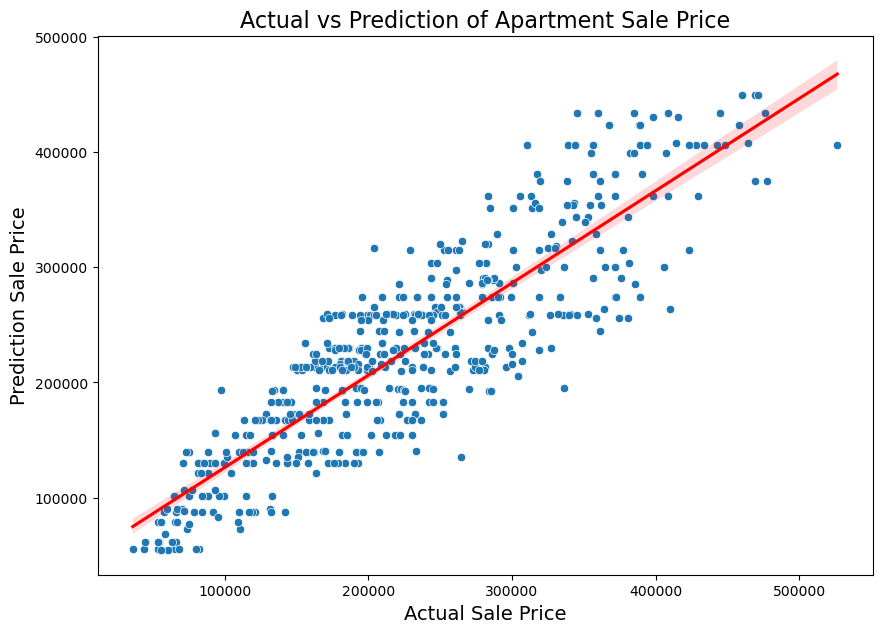

In [215]:
plt.figure(figsize=(10, 7))
plot = sns.scatterplot(x=y_test, y=y_pred_dt)
sns.regplot(x=y_test, y=y_pred_dt, scatter=False, color="red")
plt.title('Actual vs Prediction of Apartment Sale Price', fontsize=16)
plt.xlabel('Actual Sale Price', fontsize=14)
plt.ylabel('Prediction Sale Price', fontsize=14)
plt.show()

Berdasarkan perbandingan model prediksi dan aktual harga sewa apartemen, ditemukan bahwa terdapat korelasi positif di antara keduanya, dapat dilihat berdasarkan garis yang melintang ke kanan-atas dari bawah-kiri. Model prediksi cukup selaras model aktual, penyebarannya tidak selalu akurat namun relatif mendekati.

## 7. Model Explanation

### 7.1 Features Importance

Selanjutnya, kita check fitur apa saja yang mempengaruhi harga sewa apartemen, melalui Features Importance.

In [216]:
# Transformed the obtain features
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Get the Feature Importance values from Random Forest Model
feature_importances = pd.Series(best_dt['model'].feature_importances_, index=feature_names).sort_values(ascending=False)

# Create DataFrame with the Importance value
feature_imp_df = feature_importances.reset_index()  # Convert the Series to a DataFrame
feature_imp_df.columns = ['Feature', 'Importance']  # Rename the columns

# Show DataFrame
feature_imp_df.set_index('Feature').head()

,Importance
Feature,
one_hot_encoder__HallwayType_terraced,0.5370
remainder__Size(sqf),0.2280
remainder__N_Parkinglot(Basement),0.1523
remainder__N_FacilitiesNearBy(ETC),0.0335
remainder__YearBuilt,0.0169


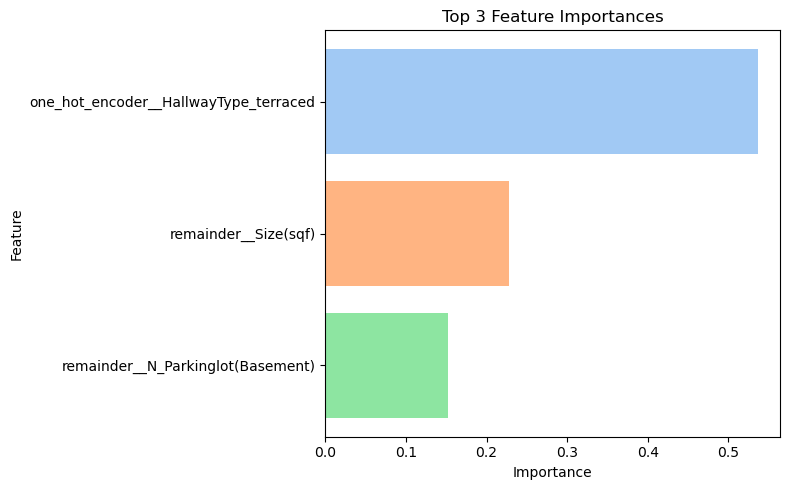

In [217]:
# Limit to top 5 features
top_3_features = feature_imp_df.head(3)

# Define a color palette with unique colors for each feature
colors = sns.color_palette('pastel', len(top_3_features))

# Plot a horizontal bar chart with different colors
plt.figure(figsize=(8, 5))
plt.barh(top_3_features['Feature'], top_3_features['Importance'], color=colors)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 3 Feature Importances')
plt.tight_layout()
plt.show()


Berdasarkan model Decision Tree, ditemukan tingkat kepentingan fitur dan seberapa besar kontribusinya terhadap model prediksi. 
- Fitur paling penting merupakan `HallwayType_terraced`, menjelaskan hallway bertipe terrace yang dimiliki oleh sebuah apartemen. Memiliki nilai sebesar 0.5370, fitur ini berkontribusi paling signifikan terhadap harga sewa apartemen, atau `SalePrice`
- Fitur `Size(sqf)` berada pada urutan kedua tertinggi, sebesar 0.2280. Ukuran unit apartemen dalam kaki persegi ini menjadi salah satu faktor signifikan pada harga sewa apartemen.
- Fitur `N_Parkinglot(basememet)` menjadi fitur ketiga tertinggi, sebesar 0.1523. Fitur ini menjelaskan bahwa jumlah parkiran bawah lantai dari sebuah apartemen, yang menjadi salah satu faktor signifikan terhadap harga sewa. 

### 7.2 Using SHAP

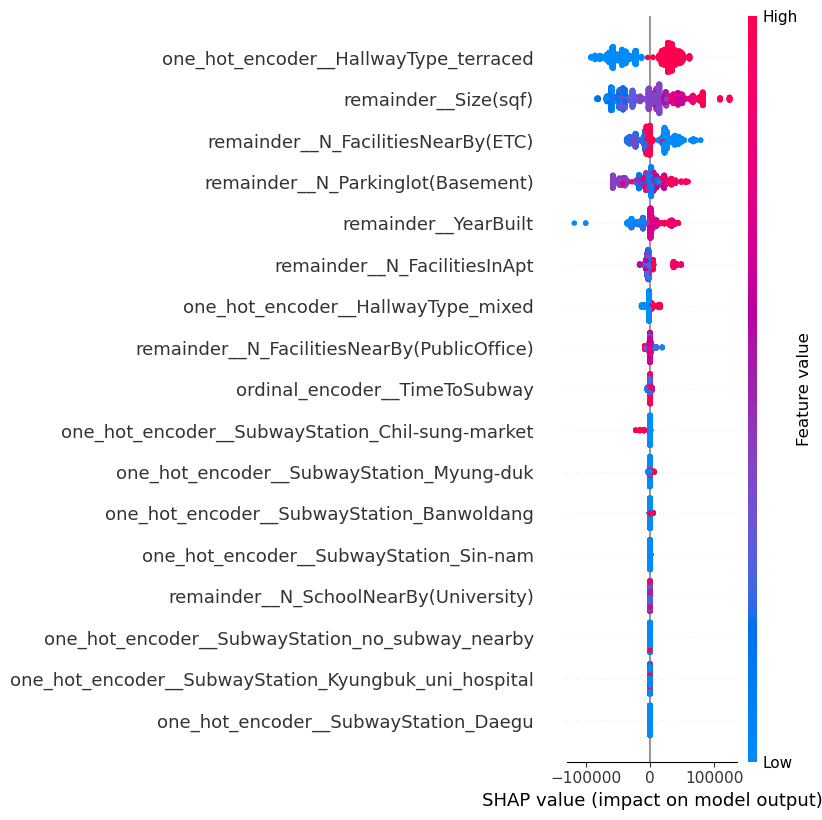

In [218]:
import shap

best_dt.fit(X_train, y_train)
X_train_transformed = best_dt[:-1].transform(X_train)

explainer = shap.Explainer(best_dt.named_steps['model'], X_train_transformed)

shap_values = explainer(X_train_transformed)

shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

## 8. Model Limitation

### 8.1 Checking the Residual Values

In [219]:
y_test_list = y_test.tolist()

In [220]:
# Create DataFrame with actual values and predictions
df_result = pd.DataFrame(data=y_test_list, columns=["y_test"], dtype=None, copy=None)
df_result["Prediction"] = y_pred_dt.tolist()

# Rename the column 'y_test' to 'Actual'
df_result = df_result.rename(columns={"y_test": "Actual"})

# Calculate the Residual and Residual Percentage
df_result["Residual"] = abs(df_result["Actual"] - df_result["Prediction"])

In [221]:
mean_residual = df_result['Residual'].mean()
std_residual = df_result['Residual'].std()

def categorize_by_std(row):
    if row['Residual'] <= mean_residual + std_residual:
        return 'Low Error'
    elif row['Residual'] <= mean_residual + 2 * std_residual:
        return 'Moderate Error'
    else:
        return 'High Error'

df_result['Residual Category'] = df_result.apply(categorize_by_std, axis=1)
display(f'Mean Residual: {mean_residual}, Standard Deviation Residual: {std_residual}')
df_result

'Mean Residual: 37902.913801262424, Standard Deviation Residual: 27299.128936197896'

,Actual,Prediction,Residual,Residual Category
0,298230,229433.1600,68796.8400,Moderate Error
1,131858,140486.2000,8628.2000,Low Error
2,477876,374780.2558,103095.7442,High Error
3,82743,129723.8077,46980.8077,Low Error
4,291415,274459.7000,16955.3000,Low Error
...,...,...,...,...
519,203539,316290.6364,112751.6364,High Error
520,132300,167546.7313,35246.7313,Low Error
521,261061,224437.2083,36623.7917,Low Error
522,203539,265363.3333,61824.3333,Low Error


Nilai residual dikategorikan berdasarkan standar deviasi untuk membagi data ke dalam kategori yang berbeda berdasarkan seberapa jauh error atau deviasi dari nilai prediksi dibandingkan dengan nilai rata-rata. Kategori-kategori ini mengklasifikasikan residual dalam tiga kelompok berdasarkan jarak error dari rata-rata residual. Tiga kelompok ini berisi `Low Error`, `Moderate Error`, dan `High Error`. Penggunaan standar deviasi dalam kategorisasi ini bertujuan untuk memberikan batas yang berbasis distribusi data. Dengan menggunakan standar deviasi, kita dapat menilai error relatif terhadap variabilitas keseluruhan dalam dataset.

In [222]:
df_result.sort_values('Residual', ascending=False).tail(10)

,Actual,Prediction,Residual,Residual Category
205,327433,328752.9333,1319.9333,Low Error
367,344690,343755.6667,934.3333,Low Error
303,62831,61909.2105,921.7895,Low Error
440,153097,153981.9130,884.9130,Low Error
503,183628,182890.8209,737.1791,Low Error
93,73451,72831.1667,619.8333,Low Error
444,168141,167546.7313,594.2687,Low Error
104,194690,195187.5000,497.5000,Low Error
113,54867,54389.0000,478.0000,Low Error
342,353982,354270.4737,288.4737,Low Error


In [223]:
df_result.groupby('Residual Category').size()

Residual Category
High Error         25
Low Error         448
Moderate Error     51
dtype: int64

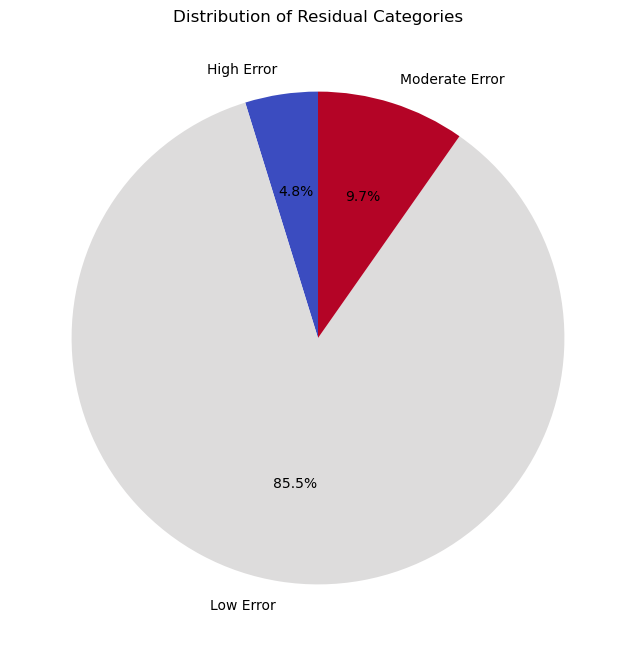

In [224]:
# Group by 'Residual Category' and get the count of each category
category_counts = df_result.groupby('Residual Category').size()

# Create a pie chart
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')

# Add title and display the chart
plt.title('Distribution of Residual Categories')
plt.show()


Berdasarkan hasil analisis yang telah dilakukan, maka dapat disimpulkan:
1. Low Error berada di rentang nilai kurang dari `65,202`. Nilai ini didapatkan dari jumlah pertambahan Mean Residual (37,902) dengan Standard Deviasi (27,299).
1. Moderate Error di rentang nilai kurang dari `92,501`. Nilai di atas rentang ini sudah termasuk High Error.
1. Berdasarkan pie chart, kategori `Low Residual` menjadi segmen terbesar, yang menjelaskan model prediksi secara `85.5%` telah mendekati nilai aktual.
1. `Medium Residual` mencakup `9.7%` dari data. Ini menunjukkan bahwa model mampu memberikan hasil yang layak dengan tingkat kesalahan yang sedang. 
1. `High Residual` mencakup `4.8%` dari data, mewakili residual di bagian atas distribusi. Hal ini mengindikasikan kesalahan prediksi yang cukup signifikan, yang mengisyaratkan perlunya investigasi terhadap interaksi fitur, distribusi data, pemilihan model, residual, kualitas data, cross-validation, hyperparameter tuning, dan deteksi anomali untuk potensi perbaikan.

Model ini masih memiliki kekurangan dan ruang untuk perbaikan, namun tetap dapat memberikan estimasi dan prediksi yang cukup baik dalam menentukan harga sewa apartemen di Daegu. Informasi ini akan bermanfaat bagi para penjual, dan juga pembeli.

## 9. Conclusion and Recommendation

### 9.1 Conclusion

Berdasarkan hasil analisis dan pemodelan yang telah dilakukan, maka didapatkan beberapa kesimpulan:
1. Terdapat tiga model yang diuji pada proses Hyperparameter Tuning, yaitu `XGBoost`, `Random Forest`, dan `Decision Tree`. Ketiga ini memiliki nilai **R-Squared** dan **RMSE** terbaik apabila dibandingkan dengan model lainnya.
1. `Decision Tree` menjadi model terbaik yang digunakan untuk memprediksi harga sewa apartemen di Daegu, di mana matriks **R-Squared** dan **RMSE**-nya menjadi yang paling baik.

    1. Tingginya nilai R-Squared (**0.7746**) menandakan model memiliki kemampuan yang baik untuk menjelaskan hubungan antara fitur dan target, meskipun masih ada **22.5%** variansi yang tidak dapat dijelaskan, menunjukkan kemungkinan adanya faktor eksternal atau variabel penting yang belum diikutsertakan dalam analisis.
    1. Penurunan RMSE dari **46777.04** menjadi **46695.30** setelah tuning menunjukkan bahwa tuning telah membantu meningkatkan akurasi prediksi. Namun, perbedaannya relatif kecil, yang mungkin mengindikasikan bahwa model sudah hampir optimal sebelum tuning, atau ruang peningkatan lebih lanjut memerlukan pendekatan lain.
    1. Jika melihat nilai RMSE yang dihasilkan oleh model Decision Tree setelah dilakukan tuning hyperparameter, maka dapat disimpulkan bahwa jika model ini digunakan untuk mengestimasi harga apartemen di Daegu pada rentang nilai yang telah dilatihkan pada model (harga maksimum 585840 won), maka estimasi rata-rata akan memiliki penyimpangan sebesar **±46,695.30** dari harga sebenarnya.

1. Berdasarkan model Decision Tree, fitur paling penting yang memengaruhi prediksi harga sewa apartemen (SalePrice) adalah `HallwayType_terraced` dengan kontribusi sebesar **0.5370**, diikuti oleh ``Size(sqf)`` sebesar **0.2280**, dan `N_Parkinglot(basement)` sebesar **0.1523**.
1. Apabila melihat ke dalam konteks yang lebih luas, harga sewa apartemen tidak hanya dipengaruhi oleh fitur-fitur yang ada dalam dataset, seperti lokasi, jumlah fasilitas yang ada, aksesibilitas terhadap transportasi umum, dan lainnya. Namun, faktor eksternal seperti kebijakan pemerintah terkait pajak properti, kondisi ekonomi masyarakat dan potensi development dari kota tersebut, juga memiliki andil dalam penentuan harga sewa apartemen. Dengan kompleksitas yang ada, akan menyulitkan untuk menentukan harga sewa yang tepat. Walaupun begitu, dengan nilai RMSE sebesar ±46,695.30 dan R-Squared 0.7746, model tetap memberikan prediksi yang cukup andal untuk digunakan sebagai referensi awal dalam menentukan harga apartemen di Daegu.

### 9.2 Recommendation

Berikut rekomendasi yang akan diberikan:
1. Agar ketepatan prediksi dapat meningkat, pertimbangkan untuk menambah fitur di dalam dataset yang dapat mempengaruhi harga sewa apartemen. Fitur seperti jumlah kamar tersedia di dalam unit, jumlah lantai yang ada dalam sebuah apartemen, dan fitur-fitur lainnya dapat ditambah, yang dapat memberikan pengaruh terhadap penetapan harga sewa.
1. Perlu memperhatikan faktor-faktor eksternal yang dapat mempengaruhi penetapan harga sewa apartemen, tidak terbatas hanya dalam kebijakan pemerintah terkait pajak properti, kondisi ekonomi masyarakat dan potensi development dari sebuah kota.
